# DSA Team Project - Team2

# Load the file < Marine Products Data> 
파일 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data2019= pd.read_csv('C:/Users/82105/data2019.csv') #엑셀에서 csv utf-8로 저장

In [3]:
data2020= pd.read_csv('C:/Users/82105/data2020.csv')

# Change column name
## Ex) '표준코드' --> 'Standard code'
Column name 영어로 변경

In [4]:
data2019.rename(columns = {'표준코드' : 'Standard code', '조합코드' : 'Union code',
                           '창고코드' : 'Warehouse code', '입출고구분' : 'Shipping and Receiving',
                           '기준일자' : 'Reference date', '조합명' : 'Union name',
                           '창고명' : 'Warehouse name', '표준코드명' : 'Standard code name',
            
                           '입출고구분명' : 'Shipping and Receiving name', '수량' : 'Quantity'}, inplace = True)

In [5]:
data2020.rename(columns = {'표준코드' : 'Standard code', '조합코드' : 'Union code',
                           '창고코드' : 'Warehouse code', '입출고구분' : 'Shipping and Receiving',
                           '기준일자' : 'Reference date', '조합명' : 'Union name',
                           '창고명' : 'Warehouse name', '표준코드명' : 'Standard code name',
                           '입출고구분명' : 'Shipping and Receiving name', '수량' : 'Quantity'}, inplace = True)

# Removes 'quotation mark' from variables
'변수'의 ' '제거

In [6]:
import string
data2020['Quantity'] = data2020['Quantity'].apply(lambda x : x.strip(string.punctuation))
data2020['Shipping and Receiving'] = data2020['Shipping and Receiving'].apply(lambda x : x.strip(string.punctuation))
data2020['Union name'] = data2020['Union name'].apply(lambda x : x.strip(string.punctuation))
data2020['Standard code name'] = data2020['Standard code name'].apply(lambda x : x.strip(string.punctuation))

In [7]:
import string
data2019['Quantity'] = data2019['Quantity'].apply(lambda x : x.strip(string.punctuation))
data2019['Shipping and Receiving'] = data2019['Shipping and Receiving'].apply(lambda x : x.strip(string.punctuation))
data2019['Union name'] = data2019['Union name'].apply(lambda x : x.strip(string.punctuation))
data2019['Standard code name'] = data2019['Standard code name'].apply(lambda x : x.strip(string.punctuation))

# Verify that a null value existed and remove it.
null값 확인 및 제거

In [8]:
data2019=data2019.dropna(axis=0)

In [9]:
data2020=data2020.dropna(axis=0)

# Simple EDA(Exploratory data analysis) 

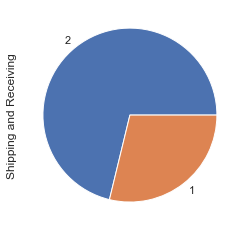

In [12]:
data2019['Shipping and Receiving'].value_counts().plot(kind='pie')

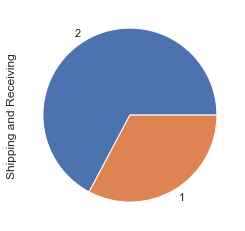

In [13]:
data2020['Shipping and Receiving'].value_counts().plot(kind='pie')

In [14]:
#data2019['Union name'].value_counts().head(n=2) # 지역별로 묶을 것임

In [15]:
#data2019['Warehouse name'].value_counts().head(n=2) # 사용하지 않을 것임

In [16]:
data2019['Standard code name'].value_counts().head() # 냉장/냉동/활/건/염장/젓갈 로 분류, 수산물 종류대로 분류할 것임

갈치류(냉동        268
고등어(냉동        237
살오징어(냉동       234
청어(냉동         180
살오징어(냉장/신선    173
Name: Standard code name, dtype: int64

# Classify standard codes into six types
## 1:refrigeration(냉장), 2: frozen(냉동), 3: dried(건), 4: live(활), 5: salt(염장), 6:  Jeotgal:Salted Seafood(젓갈)
Standard code name 6가지 종류로 분류

## 2019

In [17]:
data2019냉동=data2019[data2019['Standard code name'].str.contains('(냉동)', na=False)]
data2019냉장=data2019[data2019['Standard code name'].str.contains('(냉장/신선)', na=False)]
data2019건=data2019[data2019['Standard code name'].str.contains('(건)', na=False)]
data2019활=data2019[data2019['Standard code name'].str.contains('(활)', na=False)]
data2019염장=data2019[data2019['Standard code name'].str.contains('(염장)', na=False)]
data2019젓갈=data2019[data2019['Standard code name'].str.contains('젓', na=False)]

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [18]:
data2019냉장['type']="1"
data2019냉동['type']="2"
data2019건['type']='3'
data2019활['type']='4'
data2019염장['type']='5'
data2019젓갈['type']='6'

# 1:refrigeration(냉장), 2: frozen(냉동), 3: dried(건), 4: live(활), 5: salt(염장), 6:  Jeotgal:Salted Seafood(젓갈)

C:\Users\82105\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82105\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\82105\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [19]:
data2019=pd.concat([data2019냉장,data2019냉동,data2019건,data2019활,data2019염장,data2019젓갈])

In [20]:
data2019.head()

# 맨뒤에 type column이 생긴것을 볼 수 있음

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type
17,'61020020','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',가자미류(냉장/신선,'출고',67,1
19,'61100120','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',까나리(냉장/신선,'출고',10,1
20,'61149920','311','3110002',1,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',기타꽁치류(냉장/신선,'입고',304,1
21,'61149920','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',기타꽁치류(냉장/신선,'출고',507,1
22,'61230220','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',임연수어(냉장/신선,'출고',21,1


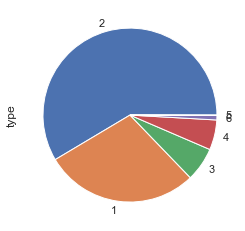

In [22]:
data2019['type'].value_counts().plot(kind='pie')

## 2020

In [23]:
data2020냉동=data2020[data2020['Standard code name'].str.contains('(냉동)', na=False)]
data2020냉장=data2020[data2020['Standard code name'].str.contains('(냉장/신선)', na=False)]
data2020건=data2020[data2020['Standard code name'].str.contains('(건)', na=False)]
data2020활=data2020[data2020['Standard code name'].str.contains('(활)', na=False)]
data2020염장=data2020[data2020['Standard code name'].str.contains('(염장)', na=False)]
data2020젓갈=data2020[data2020['Standard code name'].str.contains('젓', na=False)]

C:\Users\82105\anaconda3\lib\site-packages\pandas\core\strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [24]:
data2020냉장['type']="1"
data2020냉동['type']="2"
data2020건['type']='3'
data2020활['type']='4'
data2020염장['type']='5'
data2020젓갈['type']='6'

C:\Users\82105\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\82105\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\82105\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [25]:
data2020=pd.concat([data2020냉장,data2020냉동,data2020건,data2020활,data2020염장,data2020젓갈])

In [26]:
data2020.head()

# type column
# 1:refrigeration(냉장), 2: frozen(냉동), 3: dried(건), 4: live(활), 5: salt(염장), 6:  Jeotgal:Salted Seafood(젓갈)

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type
1,'64060120','303','3030002',1,'20200301',인천수산업협동조합,'이용가공팀(이용)',주꾸미(냉장/신선,'입고',118,1
7,'64050120','311','3110002',1,'20200301',강릉시수산업협동조합,'제빙냉동공장(이용)',살오징어(냉장/신선,'입고',291,1
8,'64050120','311','3110002',2,'20200301',강릉시수산업협동조합,'제빙냉동공장(이용)',살오징어(냉장/신선,'출고',5,1
9,'61960120','329','3290002',1,'20200301',영광군수산업협동조합,'이용가공사업소(이용)',참조기(냉장/신선,'입고',164,1
10,'61960130','329','3290002',2,'20200301',영광군수산업협동조합,'이용가공사업소(이용)',참조기(냉장/신선,'출고',267,1


In [27]:
#data2020.isna().sum()

In [28]:
#data2020['type'].value_counts()

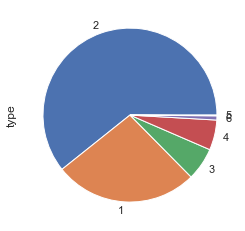

In [29]:
data2020['type'].value_counts().plot(kind='pie')

# Confirmation of increase and decrease rate by type in 2019~2020
19 ,20 년 type별 증감률 확인

In [30]:
type19 = pd.DataFrame(data2019['type'].value_counts())
type20 = pd.DataFrame(data2020['type'].value_counts())
type19.rename(columns={"type":"type19"},inplace=True)
type20.rename(columns={"type":"type20"},inplace=True)

In [31]:
type19 = type19.sort_index()
type20 = type20.sort_index()

In [32]:
type1920 = pd.concat([type19,type20],axis = 1)
type1920

,type19,type20
1,2320,2126
2,4742,4839
3,512,486
4,451,445
5,5,11
6,68,62


In [33]:
type1920['percent(%)']=((type1920["type20"]-type1920["type19"])/type1920["type19"])*100

In [34]:
type1920

,type19,type20,percent(%)
1,2320,2126,-8.362069
2,4742,4839,2.045550
3,512,486,-5.078125
4,451,445,-1.330377
5,5,11,120.000000
6,68,62,-8.823529


In [35]:
data2019['Standard code name'].value_counts().head() # 수산물 종류별로도 묶을 예정

갈치류(냉동        268
고등어(냉동        237
살오징어(냉동       234
청어(냉동         180
살오징어(냉장/신선    173
Name: Standard code name, dtype: int64

# Data that distinguishes between Shipping and Receiving volumes
입출고 구분한 데이터

## 2019

In [36]:
pieces = dict(list(data2019.groupby("Shipping and Receiving")))
data2019_ship = pieces["1"]
data2019_ship


,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type
20,'61149920','311','3110002',1,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',기타꽁치류(냉장/신선,'입고',304,1
30,'64059920','311','3110002',1,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',기타오징어류(냉장/신선,'입고',200,1
36,'62030420','319','3190002',1,'20190301',대천서부수산업협동조합,'유통사업과(이용)',골뱅이(냉장/신선,'입고',219,1
42,'61370220','325','3250002',1,'20190301',부안수산업협동조합,'격포냉동공장(이용)',참돔(냉장/신선,'입고',30,1
44,'61600120','325','3250002',1,'20190301',부안수산업협동조합,'격포냉동공장(이용)',병어(냉장/신선,'입고',4,1
...,...,...,...,...,...,...,...,...,...,...,...
3278,'93313600','300','3000002',1,'20190313',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'입고',9,6
4391,'93313600','300','3000002',1,'20190318',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'입고',1,6
4392,'93340200','300','3000002',1,'20190318',경인북부수산업협동조합,'판매사업과(이용)',멸치액젓,'입고',142,6
5683,'93313600','300','3000002',1,'20190322',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'입고',3,6


In [37]:
data2019_rec = pieces["2"]
data2019_rec

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type
17,'61020020','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',가자미류(냉장/신선,'출고',67,1
19,'61100120','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',까나리(냉장/신선,'출고',10,1
21,'61149920','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',기타꽁치류(냉장/신선,'출고',507,1
22,'61230220','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',임연수어(냉장/신선,'출고',21,1
29,'64050120','311','3110002',2,'20190301',강릉시수산업협동조합,'제빙냉동공장(이용)',살오징어(냉장/신선,'출고',44,1
...,...,...,...,...,...,...,...,...,...,...,...
7127,'93312500','361','3610002',2,'20190327',진해수산업협동조합,'이용팀(이용)',오징어젓,'출고',200,6
7128,'93313600','361','3610002',2,'20190327',진해수산업협동조합,'이용팀(이용)',새우젓,'출고',60,6
7261,'93313600','300','3000002',2,'20190328',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'출고',6,6
7560,'93313600','300','3000002',2,'20190329',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'출고',2,6


## 2020

In [38]:
pieces = dict(list(data2020.groupby("Shipping and Receiving")))
data2020_ship = pieces["1"]
data2020_ship

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type
1,'64060120','303','3030002',1,'20200301',인천수산업협동조합,'이용가공팀(이용)',주꾸미(냉장/신선,'입고',118,1
7,'64050120','311','3110002',1,'20200301',강릉시수산업협동조합,'제빙냉동공장(이용)',살오징어(냉장/신선,'입고',291,1
9,'61960120','329','3290002',1,'20200301',영광군수산업협동조합,'이용가공사업소(이용)',참조기(냉장/신선,'입고',164,1
12,'61020020','345','3450002',1,'20200301',경주시수산업협동조합,'이용가공과(이용)',가자미류(냉장/신선,'입고',23,1
14,'61A01920','345','3450002',1,'20200301',경주시수산업협동조합,'이용가공과(이용)',쥐치(냉장/신선,'입고',7,1
...,...,...,...,...,...,...,...,...,...,...,...
116,'93313600','311','3110002',1,'20200302',강릉시수산업협동조합,'제빙냉동공장(이용)',새우젓,'입고',200,6
253,'93312500','351','3510002',1,'20200302',포항수산업협동조합,'유통사업과(이용)',오징어젓,'입고',6000,6
663,'93312500','361','3610002',1,'20200303',진해수산업협동조합,'이용팀(이용)',오징어젓,'입고',3000,6
1938,'93313600','300','3000002',1,'20200309',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'입고',28,6


In [39]:
data2020_rec = pieces["2"]
data2020_rec

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type
8,'64050120','311','3110002',2,'20200301',강릉시수산업협동조합,'제빙냉동공장(이용)',살오징어(냉장/신선,'출고',5,1
10,'61960130','329','3290002',2,'20200301',영광군수산업협동조합,'이용가공사업소(이용)',참조기(냉장/신선,'출고',267,1
16,'63049920','345','3450002',2,'20200301',경주시수산업협동조합,'이용가공과(이용)',기타새우류(냉장/신선,'출고',30,1
31,'64050020','350','3500002',2,'20200301',영덕북부수산업협동조합,'이용가공과(이용)',오징어류(냉장/신선,'출고',885,1
38,'61020220','358','3580002',2,'20200301',울산수산업협동조합,'울산수협(창고)(이용)',용가자미(냉장/신선,'출고',58,1
...,...,...,...,...,...,...,...,...,...,...,...
6808,'93312500','311','3110002',2,'20200327',강릉시수산업협동조합,'제빙냉동공장(이용)',오징어젓,'출고',620,6
7325,'93313600','300','3000002',2,'20200330',경인북부수산업협동조합,'판매사업과(이용)',새우젓,'출고',1,6
7370,'93313600','311','3110002',2,'20200330',강릉시수산업협동조합,'제빙냉동공장(이용)',새우젓,'출고',40,6
7878,'93312500','361','3610002',2,'20200331',진해수산업협동조합,'이용팀(이용)',오징어젓,'출고',20,6


# Combining the variables of the Union name between close regions
Union name의 변수를 더 큰 지역으로 묶기

In [40]:
def arrange_name(raw):
    S = []
    j = raw.rfind('수')
    tag = raw[:j]
    S.append(tag)
    return S.pop()

In [41]:
data2020['Union name'] = data2020['Union name'].apply(arrange_name)
data2019['Union name'] = data2019['Union name'].apply(arrange_name)

In [42]:
def bindtoregion(w):

    JN = ['여수','영광군','나로도','전남정치망','진도군','거문도','해남군','신안군','서남해수어류양식']
    JB = ['부안']
    JJ = ['제주시','서귀포','성산포','모슬포','제주어류양식','추자도']
    GW = ['강릉시','동해시','속초시','삼척','강원고성군','원덕','죽왕']
    KB = ['포항','죽변','영덕북부','경주시','울릉군','구룡포','후포','강구']
    CN = ['보령','대천서부','서천군','서산']
    GI = ['경기남부','경인북부','인천']
    KN = ['한림','통영','마산','진해','울산','근해통발','남해군','거제','멍게수하식','욕지','삼천포','멸치권현망']
    if w in JB:
        return '전북'
    elif w in JN:
        return '전남'
    elif w in JJ:
        return '제주'
    elif w in GW:
        return '강원'
    elif w in KB:
        return '경북'
    elif w in CN:
        return '충남'
    elif w in GI:
        return '경인'
    else:
        return '경남'
    

In [43]:
data2020['Region'] = data2020['Union name'].apply(bindtoregion)
data2019['Region'] = data2019['Union name'].apply(bindtoregion)

In [44]:
data2020.head()

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type,Region
1,'64060120','303','3030002',1,'20200301',인천,'이용가공팀(이용)',주꾸미(냉장/신선,'입고',118,1,경인
7,'64050120','311','3110002',1,'20200301',강릉시,'제빙냉동공장(이용)',살오징어(냉장/신선,'입고',291,1,강원
8,'64050120','311','3110002',2,'20200301',강릉시,'제빙냉동공장(이용)',살오징어(냉장/신선,'출고',5,1,강원
9,'61960120','329','3290002',1,'20200301',영광군,'이용가공사업소(이용)',참조기(냉장/신선,'입고',164,1,전남
10,'61960130','329','3290002',2,'20200301',영광군,'이용가공사업소(이용)',참조기(냉장/신선,'출고',267,1,전남


# Check and remove data outliers
데이터 이상치 확인 및 삭제 

## Delete one digit row
row가 일의 자리수인 것을 데이터 분석의 이상치로 감안하여 삭제

In [45]:
pd.set_option('display.max_rows', None)
a = pd.DataFrame(data2020['Standard code name'].value_counts())
a

,Standard code name
고등어(냉동,258
살오징어(냉동,250
갈치류(냉동,225
정어리(냉동,189
살오징어(냉장/신선,178
참조기(냉장/신선,177
멸치(냉동,159
갈치류(냉장/신선,157
오징어류(냉동,125
삼치(냉동,118


In [46]:
q= a[a['Standard code name'] < 10].index
q

Index(['주름미더덕(냉동', '대하(냉동', '키조개(냉동', '갈전갱이(냉동', '임연수어(냉동', '조피볼락(냉동',
       '기타민물새우류(냉장/신선', '병어(활', '소라(활', '농어(냉장/신선',
       ...
       '새꼬막(피조개)(냉동', '붕장어(활', '반지(냉장/신선', '미더덕류(활', '보리새우(건', '홍합(섭조개)(건',
       '전복(활', '성게류(냉동', '홍합(섭조개)(냉동', '기타도루묵류(냉장/신선'],
      dtype='object', length=217)

In [47]:
for i in q:
    data2020.drop(data2020[data2020['Standard code name'] == i].index, inplace = True)

In [48]:
data2020['Standard code name'].value_counts().head()

고등어(냉동        258
살오징어(냉동       250
갈치류(냉동        225
정어리(냉동        189
살오징어(냉장/신선    178
Name: Standard code name, dtype: int64

In [49]:
pd.set_option('display.max_rows', None)
b = pd.DataFrame(data2019['Standard code name'].value_counts())
b

,Standard code name
갈치류(냉동,268
고등어(냉동,237
살오징어(냉동,234
청어(냉동,180
살오징어(냉장/신선,173
오징어류(냉동,169
갈치류(냉장/신선,164
참조기(냉장/신선,158
멸치(냉동,156
참조기(냉동,123


In [50]:
r= b[b['Standard code name']<10].index
r

Index(['기타미역류(건', '쥐치(냉동', '소라(냉장/신선', '갯장어(냉장/신선', '기타김류(냉장/신선',
       '기타꽁치류(냉장/신선', '화살꼴뚜기(활', '전갱이(냉동', '기타갑오징어류(냉장/신선', '우렁쉥이(활',
       ...
       '매생이(냉동', '고둥류(냉동', '은밀복(냉동', '매퉁이(냉장/신선', '멸치액젓', '기타가자미류(냉장/신선',
       '매퉁이(활', '대하(활', '기타전복류(냉장/신선', '꼬막(활'],
      dtype='object', length=210)

In [51]:
for i in r:
    data2019.drop(data2019[data2019['Standard code name'] == i].index, inplace = True)

In [52]:
data2019['Standard code name'].value_counts().head()

갈치류(냉동        268
고등어(냉동        237
살오징어(냉동       234
청어(냉동         180
살오징어(냉장/신선    173
Name: Standard code name, dtype: int64

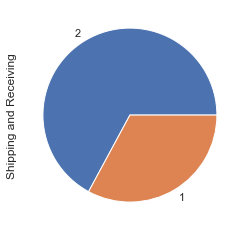

In [53]:
data2020['Shipping and Receiving'].value_counts().plot(kind='pie')

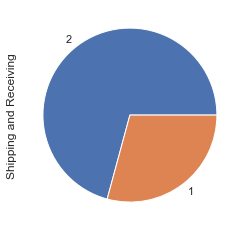

In [54]:
data2019['Shipping and Receiving'].value_counts().plot(kind='pie')

# Combining standard code name into some species by aggregating similar products
Standard code name 더 큰 수산물 종류로 묶기

In [55]:
def arrange_name2(raw):
    S = [] 
    j = raw.rfind('(') 
    if j == -1:
        tag = raw  
    else:
        tag = raw[:j] 
    S.append(tag)
    return S.pop()

In [56]:
data2020['Standard code name'] = data2020['Standard code name'].apply(arrange_name2)
data2019['Standard code name'] = data2019['Standard code name'].apply(arrange_name2)

In [57]:
def bindtoproducts(w):

    G1= ['가오리류']
    G2= ['가자미류','기타가자미류','용가자미']
    G3 = ['갈치류','기타갈치류']
    G4 = ['기타게류','기타민물게류','꽃게','민꽃게']
    G5 = ['고등어','고등어류']
    G6 = ['골뱅이']
    G7 = ['굴','굴류','기타굴류']
    G8 = ['김류']
    G9 = ['까나리']
    G10 = ['꼬막류']
    G11 = ['꼬치고기']
    G12 = ['꼴뚜기류','한치꼴뚜기','화살꼴뚜기']
    G13 = ['꽁치']
    N1 = ['낙지','낙지류']
    N2 = ['넙치']
    N3 = ['노래미류']
    N4 = ['농어']
    D1 = ['기타다랑어류','다랑어류']
    D2 = ['달고기']
    D3 = ['대하']
    D4 = ['도루묵']
    D5 = ['기타돔류','샛돔','옥돔','참돔']
    M1 = ['물메기','붉은메기']
    M2 = ['기타멸치류','멸치','멸치류']
    M3 = ['기타명태류','명태']
    M4 = ['기타모자반류']
    M5 = ['문어']
    M6 = ['미더덕','주름미더덕']
    M7 = ['미역']
    M8 = ['민어','민어류']
    B1 = ['바지락'] 
    B2 = ['박대']
    B3 = ['방어']
    B4 = ['밴댕이']
    B5 = ['벌레 문치']
    B6 = ['병어']
    B7 = ['보리멸류']
    B8 = ['기타복류','밀복','복류','검복','졸복','참복']
    B9 = ['기타볼락류','볼락류','조피볼락']
    B10 = ['부세']
    S1 = ['삼치','삼치류'] 
    S2 = ['기타민물새우류','기타새우류', '꽃새우','새우류','새젓','적새우']
    S3 = ['서대류']
    S4 = ['성대']
    S5 = ['쏙']
    S6 = ['쏨뱅이']
    A1 = ['아귀']
    A2 = ['양태','양태류']
    O1 = ['갑오징어류','기타오징어류','살오징어','오징어류','오징어젓']
    U1 = ['우렁쉥이']
    I1 = ['임연수어']
    J1 = ['붕장어','갯장어','기타장어류']
    J2 = ['기타전갱이류','전갱이','전갱이류']
    J3 = ['전어']
    J4 = ['정어리']
    J5 = ['기타기타조개류','키조개']
    J6 = ['기타조기류' ,'백조기', '수조기' ,'참조기']
    J7 = ['주꾸미']
    C1 = ['청어','청어류']
    H1 = ['기타해면기타','기타해면어류']
    if w in G1 :
        return '가오리'
    elif w in G2:
        return '가자미'
    elif w in G3:
        return '갈치'
    elif w in G4:
        return '게'
    elif w in G5:
        return '고등어'
    elif w in G6:
        return '골뱅이'
    elif w in G7:
        return '굴'
    elif w in G8:
        return '김'
    elif w in G9:
        return '까나리'
    elif w in G10:
        return '꼬막'
    elif w in G11:
        return '꼬치고기'
    elif w in G12:
        return '꼴뚜기'
    elif w in G13:
        return '꽁치'
    elif w in N1:
        return '낙지'
    elif w in N2:
        return '넙치'
    elif w in N3:
        return '노래미'
    elif w in N4:
        return '농어'
    elif w in D1:
        return '다랑어'
    elif w in D2:
        return '달고기'
    elif w in D3:
        return '대하'
    elif w in D4:
        return '도루묵'
    elif w in D5:
        return '돔'
    elif w in M1:
        return '메기'
    elif w in M2:
        return '멸치'
    elif w in M3:
        return '명태'
    elif w in M4:
        return '모자반'
    elif w in M5:
        return '문어'
    elif w in M6:
        return '미더덕'
    elif w in M7:
        return '미역'
    elif w in M8:
        return '민어'
    elif w in B1:
        return '바지락'
    elif w in B2:
        return '박대'
    elif w in B3:
        return '방어'
    elif w in B4:
        return '밴댕이'
    elif w in B5:
        return '벌레'
    elif w in B6:
        return '병어'
    elif w in B7:
        return '보리멸'
    elif w in B8:
        return '복'
    elif w in B9:
        return '볼락'
    elif w in B10:
        return '부세'
    elif w in S1:
        return '삼치'
    elif w in S2:
        return '새우'
    elif w in S3:
        return '서대류'
    elif w in S4:
        return '성대'
    elif w in S5:
        return '쏙'
    elif w in S6:
        return '쏨뱅이'
    elif w in A1:
        return '아귀'
    elif w in A2:
        return '양태'
    elif w in O1:
        return '오징어'
    elif w in U1:
        return '우렁'
    elif w in I1:
        return '임연수어'
    elif w in J1:
        return '장어'
    elif w in J2:
        return '전갱이'
    elif w in J3:
        return '전어'
    elif w in J4:
        return '정어리'
    elif w in J5:
        return '조개'
    elif w in J6:
        return '조기'
    elif w in J7:
        return '주꾸미'
    elif w in C1:
        return '청어'
    else:
        return '해면'
    

In [58]:
data2020['Products'] = data2020['Standard code name'].apply(bindtoproducts)
data2019['Products'] = data2019['Standard code name'].apply(bindtoproducts)

In [59]:
data2019.head()

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type,Region,Products
17,'61020020','311','3110002',2,'20190301',강릉시,'제빙냉동공장(이용)',가자미류,'출고',67,1,강원,가자미
19,'61100120','311','3110002',2,'20190301',강릉시,'제빙냉동공장(이용)',까나리,'출고',10,1,강원,까나리
22,'61230220','311','3110002',2,'20190301',강릉시,'제빙냉동공장(이용)',임연수어,'출고',21,1,강원,임연수어
29,'64050120','311','3110002',2,'20190301',강릉시,'제빙냉동공장(이용)',살오징어,'출고',44,1,강원,오징어
30,'64059920','311','3110002',1,'20190301',강릉시,'제빙냉동공장(이용)',기타오징어류,'입고',200,1,강원,오징어


In [60]:
data2020.head()

,Standard code,Union code,Warehouse code,Shipping and Receiving,Reference date,Union name,Warehouse name,Standard code name,Shipping and Receiving name,Quantity,type,Region,Products
1,'64060120','303','3030002',1,'20200301',인천,'이용가공팀(이용)',주꾸미,'입고',118,1,경인,주꾸미
7,'64050120','311','3110002',1,'20200301',강릉시,'제빙냉동공장(이용)',살오징어,'입고',291,1,강원,오징어
8,'64050120','311','3110002',2,'20200301',강릉시,'제빙냉동공장(이용)',살오징어,'출고',5,1,강원,오징어
9,'61960120','329','3290002',1,'20200301',영광군,'이용가공사업소(이용)',참조기,'입고',164,1,전남,조기
10,'61960130','329','3290002',2,'20200301',영광군,'이용가공사업소(이용)',참조기,'출고',267,1,전남,조기


# Comparison of shipping and receiving volume by product
각 Products 별 입고량-출고량 비교

In [61]:
#data2019[data2019['Shipping and Receiving']=='1']['Products'].value_counts().head()

In [62]:
data2019[data2019['Shipping and Receiving']=='2']['Products'].value_counts().head()

오징어    772
멸치     369
갈치     365
고등어    326
조기     321
Name: Products, dtype: int64

In [63]:
#data2020[data2020['Shipping and Receiving']=='1']['Products'].value_counts().head()

In [64]:
data2020[data2020['Shipping and Receiving']=='2']['Products'].value_counts().head()

오징어    741
조기     349
멸치     341
고등어    304
해면     295
Name: Products, dtype: int64

In [65]:
x2019= pd.DataFrame(data2019[data2019['Shipping and Receiving']=='1']['Products'].value_counts())
x2020= pd.DataFrame(data2020[data2020['Shipping and Receiving']=='1']['Products'].value_counts())

In [66]:
y2019= pd.DataFrame(data2019[data2019['Shipping and Receiving']=='2']['Products'].value_counts())
y2020= pd.DataFrame(data2020[data2020['Shipping and Receiving']=='2']['Products'].value_counts())

In [67]:
x2019=x2019.sort_index()
x2020=x2020.sort_index()
y2019=y2019.sort_index()
y2020=y2020.sort_index()

In [68]:
x2019.rename(columns={"Products":"in19"},inplace=True)
x2020.rename(columns={"Products":"in20"},inplace=True)
y2019.rename(columns={"Products":"out19"},inplace=True)
y2020.rename(columns={"Products":"out20"},inplace=True)

In [69]:
in1920=pd.concat([x2019,x2020],axis=1)
out1920=pd.concat([y2019,y2020],axis=1)

In [70]:
#in1920.head()

In [71]:
out1920.head()

,out19,out20
가오리,26,27.0
가자미,147,137.0
갈치,365,281.0
게,146,131.0
고등어,326,304.0


In [72]:
in1920['percent(%)']=((in1920["in20"]-in1920["in19"])/in1920["in19"])*100

In [73]:
out1920['percent(%)']=((out1920["out20"]-out1920["out19"])/out1920["out19"])*100

In [74]:
#in1920.head()

In [75]:
out1920.head()

,out19,out20,percent(%)
가오리,26,27.0,3.846154
가자미,147,137.0,-6.802721
갈치,365,281.0,-23.013699
게,146,131.0,-10.273973
고등어,326,304.0,-6.748466


# Check 2019 vs 2020 quantity by region, product and type
지역, product, type 별로 묶기

In [76]:
#data2019.head(30)

In [77]:
data2019['Quantity']=data2019['Quantity'].apply(pd.to_numeric)
data2019['Quantity'] = data2019['Quantity'].astype('int')
df19=pd.DataFrame(data2019.groupby(['type','Region','Products','Shipping and Receiving']).sum()['Quantity'])
df19.head(30)

Quantity
type Region Products Shipping and Receiving          
1    강원     가자미      1                            760
                     2                            769
            갈치       1                            555
                     2                            634
            고등어      2                            205
            까나리      1                            218
                     2                            290
            낙지       1                            188
                     2                            343
            넙치       1                            270
                     2                            265
            도루묵      2                             14
            명태       1                           1200
                     2                           2865
            미역       2                            539
            방어       1                            102
                     2                            210
            복        2                             20
            삼치       2                             55
            아귀       1                            128
                     2                            300
            오징어      1                           5958
                     2                           8293
            임연수어     1                            842
                     2                            549
            조기       2                            167
            주꾸미      2                             10
            청어       2                             10
     경남     가오리      1                            111
                     2                            106

In [78]:
data2020['Quantity']=data2020['Quantity'].apply(pd.to_numeric)
data2020['Quantity']=data2020['Quantity'].astype('int')
df20=pd.DataFrame(data2020.groupby(['type','Region','Products','Shipping and Receiving']).sum()['Quantity'])
df20.head(30)

Quantity
type Region Products Shipping and Receiving          
1    강원     가자미      1                            110
                     2                            235
            갈치       1                            222
                     2                             94
            고등어      1                            284
                     2                            320
            낙지       1                           2240
                     2                            230
            도루묵      1                             34
                     2                            510
            명태       1                           1228
                     2                           3130
            방어       1                             72
                     2                            201
            삼치       2                             96
            아귀       1                            305
                     2                            542
            오징어      1                           6394
                     2                           8050
            전갱이      1                             40
                     2                            140
            조기       2                             50
            주꾸미      1                            489
                     2                            634
            해면       1                             40
                     2                             28
     경남     가오리      1                             93
                     2                             86
            가자미      1                           3065
                     2                           4816

In [79]:
# df19.unstack(1)
# df20.unstack(1)

In [80]:
#data2019['number']=data2019.groupby(['Region','type','Products'])['Quantity'].transform('count')
#data2020['number']=data2020.groupby(['Region','type','Products'])['Quantity'].transform('count')

In [81]:
df19.rename(columns={'Quantity':'Quantity19'},inplace=True)
df20.rename(columns={'Quantity':'Quantity20'},inplace=True)

In [82]:
df1920=pd.concat([df19,df20],axis=1)
df1920.head()

Quantity19  Quantity20
type Region Products Shipping and Receiving                        
1    강원     가자미      1                            760.0       110.0
                     2                            769.0       235.0
            갈치       1                            555.0       222.0
                     2                            634.0        94.0
            고등어      1                              NaN       284.0

# 2019->2020 quantity increase and decrease rate
2019년과 2020년의 quantity 증감률 확인

In [83]:
df1920['percent(%)']=((df1920["Quantity20"]-df1920['Quantity19'])/df1920["Quantity19"])*100

In [84]:
df1920.head()

Quantity19  Quantity20  \
type Region Products Shipping and Receiving                           
1    강원     가자미      1                            760.0       110.0   
                     2                            769.0       235.0   
            갈치       1                            555.0       222.0   
                     2                            634.0        94.0   
            고등어      1                              NaN       284.0   

                                             percent(%)  
type Region Products Shipping and Receiving              
1    강원     가자미      1                       -85.526316  
                     2                       -69.440832  
            갈치       1                       -60.000000  
                     2                       -85.173502  
            고등어      1                              NaN

# Analyzing the volume of transactions by combining the amount of shipping and receiving
입고량과 출고량을 거래량으로 합쳐서 분석

In [85]:
df19203 = df1920.copy()

In [86]:
df19203. drop(['percent(%)'],axis = 1, inplace = True)

In [87]:
df19203 = df19203.unstack([0,1,2]).fillna(0)

In [88]:
df19203.head()

Quantity19                                           \
type                            1                                            
Region                         강원                                            
Products                      가자미     갈치    고등어    까나리     낙지     넙치   도루묵   
Shipping and Receiving                                                       
1                           760.0  555.0    0.0  218.0  188.0  270.0   0.0   
2                           769.0  634.0  205.0  290.0  343.0  265.0  14.0   

                                              ... Quantity20                \
type                                          ...          4      5          
Region                                        ...         충남     경남     전남   
Products                    명태     미역     방어  ...         조개    고등어    고등어   
Shipping and Receiving                        ...                            
1                       1200.0    0.0  102.0  ...      774.0   40.0    0.0   
2                       2865.0  539.0  210.0  ...      291.0  202.0  599.0   

                                                                          
type                         6                                            
Region                      강원             경남             경북    경인    전남  
Products                   오징어     해면     오징어     해면     오징어    해면    해면  
Shipping and Receiving                                                    
1                          0.0  200.0  3000.0    0.0  6000.0  31.0   0.0  
2                       2071.0  490.0  3291.0  645.0  5232.0  80.0  55.0  

[2 rows x 852 columns]

In [89]:
df19203.loc['transactions']=df19203.loc['1']+df19203.loc['2']

In [90]:
df1919 = df19203.xs('Quantity19', axis = 1) #quantity 19 
df2020 = df19203.xs('Quantity20', axis = 1)  # quantity 20

In [91]:
#df1919

In [92]:
df20202 = df2020.drop(['1','2'])
df20202

type                        1                                                 \
Region                     강원                                                  
Products                  가자미     갈치    고등어  까나리      낙지   넙치    도루묵      명태   
Shipping and Receiving                                                         
transactions            345.0  316.0  604.0  0.0  2470.0  0.0  544.0  4358.0   

type                                ...       4      5              6         \
Region                              ...      충남     경남     전남      강원          
Products                 미역     방어  ...      조개    고등어    고등어     오징어     해면   
Shipping and Receiving              ...                                        
transactions            0.0  273.0  ...  1065.0  242.0  599.0  2071.0  690.0   

type                                                         
Region                      경남              경북     경인    전남  
Products                   오징어     해면      오징어     해면    해면  
Shipping and Receiving                                       
transactions            6291.0  645.0  11232.0  111.0  55.0  

[1 rows x 426 columns]

## 2020

In [93]:
transaction20 = df20202.stack(0)

In [94]:
transaction20  = transaction20 .stack(1).fillna(0)

In [95]:
transaction20 ['sum20'] = transaction20 ['강원'] + transaction20 ['경남'] + transaction20 ['경북'] + transaction20 ['경인'] + transaction20 ['전남'] + transaction20 ['전북'] + transaction20 ['충남']

In [96]:
transaction20 .drop(['강원','경남','경북','경인','전남','전북','제주','충남'],axis=1,inplace = True)

In [97]:
transaction20  = transaction20 .reset_index(level=0,drop=True)

In [98]:
transaction20 

Region            sum20
type Products          
1    가오리          449.0
     가자미         8834.0
     갈치         17363.0
     게              0.0
     고등어        12590.0
     골뱅이         1585.0
     까나리            0.0
     꼬막          2341.0
     꼴뚜기            0.0
     꽁치          3026.0
     낙지          3535.0
     넙치             0.0
     농어             0.0
     다랑어         2181.0
     도루묵         2425.0
     돔              0.0
     메기           281.0
     멸치         43660.0
     명태          4510.0
     문어            98.0
     미역             0.0
     민어          7180.0
     박대           392.0
     방어           535.0
     밴댕이        20459.0
     병어           205.0
     복              0.0
     볼락             0.0
     삼치          1441.0
     새우          2283.0
     성대           257.0
     아귀          1616.0
     양태             0.0
     오징어        65098.0
     임연수어           0.0
     장어          1259.0
     전갱이        24620.0
     전어         22035.0
     정어리          885.0
     조기         60898.0
     주꾸미         3437.0
     청어         23637.0
     해면          5493.0
2    가오리          239.0
     가자미          965.0
     갈치          9534.0
     게          10288.0
     고등어        60206.0
     골뱅이          963.0
     굴         122959.0
     김           7142.0
     까나리        55009.0
     꼬치고기       35202.0
     꼴뚜기            0.0
     꽁치          2501.0
     낙지          8732.0
     넙치           224.0
     노래미            0.0
     농어           824.0
     다랑어        16343.0
     달고기            0.0
     대하             0.0
     도루묵           68.0
     돔           4991.0
     메기           183.0
     멸치        238009.0
     명태         65468.0
     모자반            0.0
     문어           529.0
     미더덕            0.0
     민어          6798.0
     바지락         1757.0
     방어          6492.0
     병어          2971.0
     보리멸          845.0
     복          16728.0
     볼락            46.0
     부세           282.0
     삼치         22899.0
     새우         28307.0
     서대류         1162.0
     성대           425.0
     쏙           2634.0
     쏨뱅이            0.0
     아귀          5731.0
     양태          1550.0
     오징어       170508.0
     우렁          8938.0
     임연수어           0.0
     장어          7488.0
     전갱이         1187.0
     전어         37933.0
     정어리       173579.0
     조개          1840.0
     조기         28491.0
     주꾸미         6991.0
     청어         16542.0
     해면         78754.0
3    김          19656.0
     낙지          2250.0
     멸치        117668.0
     명태          9231.0
     미역             0.0
     민어          2147.0
     새우          1323.0
     오징어         4439.0
     조기             0.0
4    가자미          478.0
     갈치          1085.0
     게            702.0
     넙치             0.0
     다랑어            0.0
     미더덕         2218.0
     복           4538.0
     아귀           766.0
     오징어          267.0
     전어             0.0
     조개          1065.0
     주꾸미        18335.0
     청어             0.0
     해면          2410.0
5    고등어          841.0
6    오징어        19594.0
     해면          1501.0

## 2019

In [99]:
df19191 = df1919.drop(['1','2'])

In [100]:
transaction19 = df19191.stack(0)

In [101]:
transaction19 = transaction19.stack(1).fillna(0)

In [102]:
transaction19['sum19'] = transaction19['강원'] + transaction19['경남'] + transaction19['경북'] + transaction19['경인'] + transaction19['전남'] + transaction19['전북'] + transaction19['충남']

In [103]:
transaction19.drop(['강원','경남','경북','경인','전남','전북','제주','충남'],axis=1,inplace = True)

In [104]:
transaction19 = transaction19.reset_index(level=0,drop=True)

In [105]:
transaction19

Region            sum19
type Products          
1    가오리          274.0
     가자미        12456.0
     갈치         24099.0
     게            669.0
     고등어        20531.0
     골뱅이         3792.0
     까나리          508.0
     꼬막          2734.0
     꼴뚜기            0.0
     꽁치          5194.0
     낙지          1809.0
     넙치          4417.0
     농어           540.0
     다랑어            0.0
     도루묵          517.0
     돔            302.0
     메기          1446.0
     멸치        114812.0
     명태          4792.0
     문어             0.0
     미역          1123.0
     민어          1759.0
     박대           287.0
     방어          2903.0
     밴댕이        10065.0
     병어          1345.0
     복           1531.0
     볼락            79.0
     삼치         19392.0
     새우           800.0
     성대             0.0
     아귀          6150.0
     양태           305.0
     오징어        54268.0
     임연수어        1426.0
     장어           466.0
     전갱이         5172.0
     전어         37985.0
     정어리            0.0
     조기         39959.0
     주꾸미         2242.0
     청어         67417.0
     해면          2650.0
2    가오리          110.0
     가자미         2254.0
     갈치         17712.0
     게          17569.0
     고등어        35077.0
     골뱅이         2060.0
     굴          77655.0
     김           6386.0
     까나리       105062.0
     꼬치고기        1090.0
     꼴뚜기          124.0
     꽁치          3913.0
     낙지         26698.0
     넙치          9734.0
     노래미           36.0
     농어          1564.0
     다랑어         6344.0
     달고기          416.0
     대하          2250.0
     도루묵            0.0
     돔           2048.0
     메기           219.0
     멸치        175864.0
     명태         48258.0
     모자반         4523.0
     문어           500.0
     미더덕         8287.0
     민어          4768.0
     바지락          779.0
     방어          2099.0
     병어          4085.0
     보리멸          173.0
     복          20730.0
     볼락            87.0
     부세            98.0
     삼치         28628.0
     새우         42372.0
     서대류          310.0
     성대           778.0
     쏙           2384.0
     쏨뱅이           20.0
     아귀         18171.0
     양태          2202.0
     오징어       206877.0
     우렁          1349.0
     임연수어         288.0
     장어          4253.0
     전갱이            0.0
     전어          9519.0
     정어리        19318.0
     조개          3433.0
     조기         22394.0
     주꾸미         1425.0
     청어         73003.0
     해면        103626.0
3    김          22520.0
     낙지          3720.0
     멸치        129418.0
     명태          4608.0
     미역          2090.0
     민어          1319.0
     새우          2483.0
     오징어        10353.0
     조기             0.0
4    가자미          466.0
     갈치             0.0
     게           5057.0
     넙치             0.0
     다랑어          853.0
     미더덕            0.0
     복           8302.0
     아귀          2569.0
     오징어         2293.0
     전어         29782.0
     조개             0.0
     주꾸미            0.0
     청어          2795.0
     해면          7883.0
5    고등어            0.0
6    오징어        29317.0
     해면          4098.0

In [106]:
#transaction19['sum19']

## Create an array for analysis of transaction volume
거래량 분석을 위한 array 만들기

In [107]:
#transaction19

In [108]:
t_array = np.array(transaction20['sum20'])
t_array2 = np.array(transaction19['sum19'])

In [109]:
t_array[0]

449.0

In [110]:
len(t_array)

124

In [111]:
t_array2[0]

274.0

In [112]:
len(t_array2)

124

# Comparing Algorithm Performance with Transaction Volume array and random values we added
거래량으로 알고리즘 성능비교

In [145]:
testTimeQuick = []
testTimeSel = []
testTimeBubb = []
testTimeMer = []

In [146]:
testTimeShell = []
testTimeHeap = []

In [147]:
from time import time
def run_time(fn, S):
    start_time = time()
    fn(S)
    end_time = time()
    elapsed = end_time - start_time
    return elapsed

In [148]:
#calculate mean and stdev
import numpy as np
print(np.mean(t_array))
print(np.std(t_array))

14728.862903225807
35386.144925875655


In [149]:
#calculate mean and stdev
import numpy as np
print(np.mean(t_array2))
print(np.std(t_array2))

14960.193548387097
32827.67871871713


In [150]:
# generate random Gaussian values
from random import seed
from random import gauss
# seed random number generator
seed(1)
S10 = []
# generate some Gaussian values
for _ in range(10):
    value = gauss(14728.86, 35386.14) #mean, stdev
    print(int(value))
    S10.append(int(value))

60312
66019
17076
-12325
-23918
15837
-21439
-36114
21781
19448


In [151]:
#100 data
S100 = []
for _ in range(100):
    value = gauss(14728.86, 35386.14) #mean, stdev
    #print(int(value))
    S100.append(int(value))

In [152]:
#1000 data
S1000 = []
for _ in range(1000):
    value = gauss(14728.86, 35386.14) #mean, stdev
    #print(int(value))
    S1000.append(int(value))

In [153]:
#10000 data
S10000 = []
for _ in range(10000):
    value = gauss(14728.86, 35386.14) #mean, stdev
    #print(int(value))
    S10000.append(int(value))

In [180]:
se100 = run_time(sel_sort,S100)
testTimeSel.append(se100)
se1000 = run_time(sel_sort, S1000)
testTimeSel.append(se1000)
se10000 = run_time(sel_sort, S10000)
testTimeSel.append(se10000)

In [181]:
testTimeSel

[0.001783132553100586, 0.12965750694274902, 10.781588077545166]

In [154]:
e100 = run_time(quick_sorted,S100)
testTimeQuick.append(e100)
e1000 = run_time(quick_sorted, S1000)
testTimeQuick.append(e1000)
e10000 = run_time(quick_sorted, S10000)
testTimeQuick.append(e10000)

In [155]:
testTimeQuick

[0.0, 0.009952545166015625, 0.10826921463012695]

In [182]:
b100 = run_time(Bubble_sort,S100)
testTimeBubb.append(b100)
b1000 = run_time(Bubble_sort, S1000)
testTimeBubb.append(b1000)
b10000 = run_time(Bubble_sort, S10000)
testTimeBubb.append(b10000)

In [183]:
testTimeBubb

[0.000949859619140625, 0.18612241744995117, 22.903979301452637]

In [184]:
me100 = run_time(mergeSort,S100)
testTimeMer.append(me100)
me1000 = run_time(mergeSort, S1000)
testTimeMer.append(me1000)
me10000 = run_time(mergeSort, S10000)
testTimeMer.append(me10000)

[-72289, -49394]
[-85618, -72289, -49394]
[-40149, -38556]
[-46619, -40149, -38556]
[-85618, -72289, -49394, -46619, -40149, -38556]
[-33292, -32434]
[-35996, -33292, -32434]
[-31360, -28980]
[-31459, -31360, -28980]
[-35996, -33292, -32434, -31459, -31360, -28980]
[-85618, -72289, -49394, -46619, -40149, -38556, -35996, -33292, -32434, -31459, -31360, -28980]
[-25143, -23731]
[-26014, -25143, -23731]
[-23385, -20339]
[-23569, -23385, -20339]
[-26014, -25143, -23731, -23569, -23385, -20339]
[-19908, -19825]
[-20262, -19908, -19825]
[-17613, -12122]
[-6651, -5549]
[-17613, -12122, -6651, -5549]
[-20262, -19908, -19825, -17613, -12122, -6651, -5549]
[-26014, -25143, -23731, -23569, -23385, -20339, -20262, -19908, -19825, -17613, -12122, -6651, -5549]
[-85618, -72289, -49394, -46619, -40149, -38556, -35996, -33292, -32434, -31459, -31360, -28980, -26014, -25143, -23731, -23569, -23385, -20339, -20262, -19908, -19825, -17613, -12122, -6651, -5549]
[-3693, -2965]
[-5060, -3693, -2965]
[-769

[-66861, -66814]
[-67005, -66861, -66814]
[-67049, -67048, -67005, -66861, -66814]
[-67433, -67278, -67171, -67092, -67086, -67049, -67048, -67005, -66861, -66814]
[-68789, -68754, -68560, -68362, -68267, -68239, -68171, -67822, -67470, -67433, -67278, -67171, -67092, -67086, -67049, -67048, -67005, -66861, -66814]
[-66800, -66724]
[-66572, -66174]
[-66695, -66572, -66174]
[-66800, -66724, -66695, -66572, -66174]
[-66084, -65954]
[-65364, -65221]
[-65517, -65364, -65221]
[-66084, -65954, -65517, -65364, -65221]
[-66800, -66724, -66695, -66572, -66174, -66084, -65954, -65517, -65364, -65221]
[-65193, -65123]
[-64654, -64642]
[-64668, -64654, -64642]
[-65193, -65123, -64668, -64654, -64642]
[-64510, -64447]
[-64159, -63496]
[-64446, -64159, -63496]
[-64510, -64447, -64446, -64159, -63496]
[-65193, -65123, -64668, -64654, -64642, -64510, -64447, -64446, -64159, -63496]
[-66800, -66724, -66695, -66572, -66174, -66084, -65954, -65517, -65364, -65221, -65193, -65123, -64668, -64654, -64642, 

[-31527, -31524, -31501, -31468, -31466, -31461, -31398, -31391, -31373, -31364, -31333, -31315, -31293, -31286, -31276, -31263, -31262, -31254, -31217, -31195, -31186, -31178, -31155, -31148, -31135, -31116, -31080, -31058, -31039, -31016, -30923, -30915, -30907, -30897, -30883, -30881, -30876, -30874, -30848, -30840, -30837, -30834, -30783, -30775, -30708, -30690, -30661, -30599, -30540, -30536, -30505, -30474, -30460, -30458, -30428, -30372, -30370, -30342, -30341, -30308, -30293, -30283, -30266, -30197, -30157, -30132, -30094, -30083, -30067, -30031, -30015, -30004, -29971, -29965, -29921, -29901, -29892, -29852, -29816, -29805, -29803, -29759, -29759, -29739, -29710, -29704, -29703, -29686, -29661, -29661, -29631, -29625, -29614, -29612, -29608, -29594, -29578, -29572, -29566, -29549, -29531, -29528, -29515, -29509, -29507, -29437, -29435, -29432, -29427, -29423, -29406, -29393, -29359, -29329, -29326, -29325, -29325, -29303, -29272, -29230, -29213, -29187, -29146, -29141, -29119,

[-11535, -11477]
[-11563, -11535, -11477]
[-11609, -11569, -11563, -11535, -11477]
[-11647, -11635, -11633, -11627, -11624, -11609, -11569, -11563, -11535, -11477]
[-11447, -11435]
[-11345, -11330]
[-11418, -11345, -11330]
[-11447, -11435, -11418, -11345, -11330]
[-11314, -11277]
[-11271, -11246]
[-11271, -11271, -11246]
[-11314, -11277, -11271, -11271, -11246]
[-11447, -11435, -11418, -11345, -11330, -11314, -11277, -11271, -11271, -11246]
[-11647, -11635, -11633, -11627, -11624, -11609, -11569, -11563, -11535, -11477, -11447, -11435, -11418, -11345, -11330, -11314, -11277, -11271, -11271, -11246]
[-11966, -11951, -11948, -11936, -11919, -11873, -11862, -11842, -11831, -11822, -11797, -11775, -11773, -11744, -11709, -11709, -11705, -11681, -11655, -11647, -11635, -11633, -11627, -11624, -11609, -11569, -11563, -11535, -11477, -11447, -11435, -11418, -11345, -11330, -11314, -11277, -11271, -11271, -11246]
[-11205, -11201]
[-11194, -11164]
[-11205, -11201, -11194, -11164]
[-11148, -1114

[-2488, -2486, -2467, -2465, -2458, -2457, -2455, -2449, -2431, -2399]
[-2398, -2394]
[-2390, -2355]
[-2391, -2390, -2355]
[-2398, -2394, -2391, -2390, -2355]
[-2350, -2328]
[-2301, -2298]
[-2301, -2301, -2298]
[-2350, -2328, -2301, -2301, -2298]
[-2398, -2394, -2391, -2390, -2355, -2350, -2328, -2301, -2301, -2298]
[-2488, -2486, -2467, -2465, -2458, -2457, -2455, -2449, -2431, -2399, -2398, -2394, -2391, -2390, -2355, -2350, -2328, -2301, -2301, -2298]
[-2297, -2294]
[-2281, -2278]
[-2291, -2281, -2278]
[-2297, -2294, -2291, -2281, -2278]
[-2265, -2222]
[-2218, -2211]
[-2220, -2218, -2211]
[-2265, -2222, -2220, -2218, -2211]
[-2297, -2294, -2291, -2281, -2278, -2265, -2222, -2220, -2218, -2211]
[-2198, -2190]
[-2151, -2142]
[-2182, -2151, -2142]
[-2198, -2190, -2182, -2151, -2142]
[-2140, -2134]
[-2123, -2120]
[-2126, -2123, -2120]
[-2140, -2134, -2126, -2123, -2120]
[-2198, -2190, -2182, -2151, -2142, -2140, -2134, -2126, -2123, -2120]
[-2297, -2294, -2291, -2281, -2278, -2265, -222

[6973, 6994, 7009]
[6965, 6973, 6973, 6994, 7009]
[7026, 7028]
[7030, 7044]
[7030, 7030, 7044]
[7026, 7028, 7030, 7030, 7044]
[6965, 6973, 6973, 6994, 7009, 7026, 7028, 7030, 7030, 7044]
[6850, 6872, 6877, 6886, 6902, 6914, 6941, 6944, 6949, 6955, 6965, 6973, 6973, 6994, 7009, 7026, 7028, 7030, 7030, 7044]
[6759, 6767, 6767, 6777, 6781, 6784, 6785, 6785, 6792, 6800, 6808, 6813, 6814, 6833, 6835, 6837, 6839, 6846, 6846, 6850, 6872, 6877, 6886, 6902, 6914, 6941, 6944, 6949, 6955, 6965, 6973, 6973, 6994, 7009, 7026, 7028, 7030, 7030, 7044]
[7050, 7055]
[7059, 7070]
[7050, 7055, 7059, 7070]
[7072, 7082]
[7088, 7099]
[7082, 7088, 7099]
[7072, 7082, 7082, 7088, 7099]
[7050, 7055, 7059, 7070, 7072, 7082, 7082, 7088, 7099]
[7107, 7107]
[7124, 7155]
[7115, 7124, 7155]
[7107, 7107, 7115, 7124, 7155]
[7168, 7173]
[7217, 7233]
[7185, 7217, 7233]
[7168, 7173, 7185, 7217, 7233]
[7107, 7107, 7115, 7124, 7155, 7168, 7173, 7185, 7217, 7233]
[7050, 7055, 7059, 7070, 7072, 7082, 7082, 7088, 7099, 7107, 7

[15617, 15622, 15629, 15674, 15689]
[15718, 15722]
[15744, 15745]
[15739, 15744, 15745]
[15718, 15722, 15739, 15744, 15745]
[15617, 15622, 15629, 15674, 15689, 15718, 15722, 15739, 15744, 15745]
[15541, 15542, 15551, 15558, 15558, 15562, 15572, 15601, 15616, 15617, 15622, 15629, 15674, 15689, 15718, 15722, 15739, 15744, 15745]
[15749, 15761]
[15769, 15775]
[15761, 15769, 15775]
[15749, 15761, 15761, 15769, 15775]
[15777, 15801]
[15819, 15840]
[15810, 15819, 15840]
[15777, 15801, 15810, 15819, 15840]
[15749, 15761, 15761, 15769, 15775, 15777, 15801, 15810, 15819, 15840]
[15844, 15851]
[15860, 15870]
[15856, 15860, 15870]
[15844, 15851, 15856, 15860, 15870]
[15871, 15876]
[15880, 15897]
[15878, 15880, 15897]
[15871, 15876, 15878, 15880, 15897]
[15844, 15851, 15856, 15860, 15870, 15871, 15876, 15878, 15880, 15897]
[15749, 15761, 15761, 15769, 15775, 15777, 15801, 15810, 15819, 15840, 15844, 15851, 15856, 15860, 15870, 15871, 15876, 15878, 15880, 15897]
[15541, 15542, 15551, 15558, 15558, 

[23863, 23866, 23883, 23890, 23899, 23926, 23928, 23932, 23934, 23960, 23967, 23982, 23984, 23998, 23999, 24000, 24005, 24049, 24050, 24062, 24068, 24086, 24094, 24102, 24102, 24104, 24107, 24129, 24136, 24148, 24149, 24149, 24176, 24187, 24188, 24191, 24198, 24201, 24207, 24210, 24214, 24217, 24219, 24228, 24237, 24238, 24250, 24267, 24278, 24281, 24290, 24298, 24301, 24312, 24314, 24324, 24371, 24373, 24380, 24386, 24388, 24390, 24403, 24414, 24439, 24451, 24458, 24458, 24462, 24464, 24473, 24478, 24492, 24492, 24501, 24512, 24543, 24550]
[23140, 23145, 23165, 23170, 23179, 23196, 23200, 23201, 23202, 23207, 23208, 23210, 23225, 23229, 23235, 23241, 23248, 23259, 23289, 23306, 23324, 23326, 23327, 23362, 23368, 23378, 23379, 23396, 23397, 23410, 23423, 23452, 23456, 23463, 23467, 23470, 23481, 23496, 23499, 23502, 23503, 23514, 23527, 23532, 23536, 23547, 23550, 23556, 23565, 23570, 23583, 23610, 23637, 23649, 23656, 23666, 23691, 23691, 23717, 23731, 23743, 23754, 23757, 23761, 2376

[34119, 34126, 34152, 34158, 34160]
[34162, 34165]
[34177, 34178]
[34171, 34177, 34178]
[34162, 34165, 34171, 34177, 34178]
[34119, 34126, 34152, 34158, 34160, 34162, 34165, 34171, 34177, 34178]
[34183, 34187]
[34193, 34231]
[34189, 34193, 34231]
[34183, 34187, 34189, 34193, 34231]
[34267, 34279]
[34304, 34305]
[34288, 34304, 34305]
[34267, 34279, 34288, 34304, 34305]
[34183, 34187, 34189, 34193, 34231, 34267, 34279, 34288, 34304, 34305]
[34119, 34126, 34152, 34158, 34160, 34162, 34165, 34171, 34177, 34178, 34183, 34187, 34189, 34193, 34231, 34267, 34279, 34288, 34304, 34305]
[33865, 33867, 33884, 33890, 33905, 33929, 33933, 33967, 34012, 34030, 34032, 34040, 34044, 34046, 34049, 34063, 34074, 34084, 34092, 34119, 34126, 34152, 34158, 34160, 34162, 34165, 34171, 34177, 34178, 34183, 34187, 34189, 34193, 34231, 34267, 34279, 34288, 34304, 34305]
[33487, 33488, 33491, 33511, 33526, 33547, 33568, 33581, 33582, 33588, 33589, 33605, 33626, 33630, 33661, 33691, 33693, 33698, 33707, 33711, 33

[45898, 45927, 45953, 45958, 45963]
[45831, 45837, 45865, 45884, 45885, 45898, 45927, 45953, 45958, 45963]
[46005, 46011]
[46027, 46034]
[46012, 46027, 46034]
[46005, 46011, 46012, 46027, 46034]
[46041, 46048]
[46068, 46077]
[46063, 46068, 46077]
[46041, 46048, 46063, 46068, 46077]
[46005, 46011, 46012, 46027, 46034, 46041, 46048, 46063, 46068, 46077]
[45831, 45837, 45865, 45884, 45885, 45898, 45927, 45953, 45958, 45963, 46005, 46011, 46012, 46027, 46034, 46041, 46048, 46063, 46068, 46077]
[46081, 46082]
[46094, 46106]
[46088, 46094, 46106]
[46081, 46082, 46088, 46094, 46106]
[46118, 46127]
[46186, 46214]
[46133, 46186, 46214]
[46118, 46127, 46133, 46186, 46214]
[46081, 46082, 46088, 46094, 46106, 46118, 46127, 46133, 46186, 46214]
[46226, 46231]
[46249, 46262]
[46246, 46249, 46262]
[46226, 46231, 46246, 46249, 46262]
[46304, 46309]
[46325, 46348]
[46325, 46325, 46348]
[46304, 46309, 46325, 46325, 46348]
[46226, 46231, 46246, 46249, 46262, 46304, 46309, 46325, 46325, 46348]
[46081, 460

[63768, 63776, 63780, 63809, 63825]
[63706, 63710, 63738, 63744, 63761, 63768, 63776, 63780, 63809, 63825]
[63481, 63569, 63618, 63660, 63669, 63670, 63683, 63687, 63693, 63703, 63706, 63710, 63738, 63744, 63761, 63768, 63776, 63780, 63809, 63825]
[63146, 63147, 63147, 63156, 63172, 63195, 63204, 63237, 63250, 63367, 63384, 63399, 63426, 63426, 63445, 63448, 63455, 63458, 63463, 63481, 63569, 63618, 63660, 63669, 63670, 63683, 63687, 63693, 63703, 63706, 63710, 63738, 63744, 63761, 63768, 63776, 63780, 63809, 63825]
[63834, 63849]
[63871, 63885]
[63834, 63849, 63871, 63885]
[63899, 63912]
[63928, 63939]
[63920, 63928, 63939]
[63899, 63912, 63920, 63928, 63939]
[63834, 63849, 63871, 63885, 63899, 63912, 63920, 63928, 63939]
[63995, 64023]
[64049, 64063]
[64040, 64049, 64063]
[63995, 64023, 64040, 64049, 64063]
[64067, 64098]
[64134, 64140]
[64107, 64134, 64140]
[64067, 64098, 64107, 64134, 64140]
[63995, 64023, 64040, 64049, 64063, 64067, 64098, 64107, 64134, 64140]
[63834, 63849, 63871

In [185]:
testTimeMer

[0.006984233856201172, 0.0951683521270752, 2.0628297328948975]

In [186]:
he100 = run_time(heapSort,S100)
testTimeHeap.append(he100)
he1000 = run_time(heapSort, S1000)
testTimeHeap.append(he1000)
he10000 = run_time(heapSort, S10000)
testTimeHeap.append(he10000)

In [187]:
sh100 = run_time(shellSort,S100)
testTimeShell.append(sh100)
sh1000 = run_time(shellSort, S1000)
testTimeShell.append(sh1000)
sh10000 = run_time(shellSort, S10000)
testTimeShell.append(sh10000)

In [188]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
x = [100, 1000, 10000]

In [189]:
print(len(testTimeMer))
print(len(testTimeSel))
print(len(testTimeQuick))
print(len(testTimeBubb))

3
3
3
3


## 2020

In [156]:
testTimeQuick20 = []
testTimeSel20 = []
testTimeBubb20 = []
testTimeMer20 = []

In [157]:
testTimeShell20 = []
testTimeHeap20 = []

In [158]:
#100 data
SS100 = []
for _ in range(100):
    value = gauss(14960.19, 32827.67) #mean, stdev
    #print(int(value))
    SS100.append(int(value))

In [159]:
#1000 data
SS1000 = []
for _ in range(1000):
    value = gauss(14960.19, 32827.67) #mean, stdev
    #print(int(value))
    SS1000.append(int(value))

In [160]:
#10000 data
SS10000 = []
for _ in range(10000):
    value = gauss(14960.19, 32827.67) #mean, stdev
    #print(int(value))
    SS10000.append(int(value))

In [190]:
seS100 = run_time(sel_sort,S100)
testTimeSel20.append(seS100)
seS1000 = run_time(sel_sort, S1000)
testTimeSel20.append(seS1000)
seS10000 = run_time(sel_sort, S10000)
testTimeSel20.append(seS10000)

In [191]:
testTimeSel20

[0.0009982585906982422, 0.08975768089294434, 10.688586473464966]

In [162]:
import sys
sys.setrecursionlimit(100000)

In [163]:
eS100 = run_time(quick_sorted,S100)
testTimeQuick20.append(eS100)
eS1000 = run_time(quick_sorted, S1000)
testTimeQuick20.append(eS1000)
eS10000 = run_time(quick_sorted, S10000)
testTimeQuick20.append(eS10000)

In [192]:
bS100 = run_time(Bubble_sort,S100)
testTimeBubb20.append(bS100)
bS1000 = run_time(Bubble_sort, S1000)
testTimeBubb20.append(bS1000)
bS10000 = run_time(Bubble_sort, S10000)
testTimeBubb20.append(bS10000)

In [193]:
me100 = run_time(mergeSort,S100)
testTimeMer20.append(me100)
me1000 = run_time(mergeSort, S1000)
testTimeMer20.append(me1000)
me10000 = run_time(mergeSort, S10000)
testTimeMer20.append(me10000)

[-72289, -49394]
[-85618, -72289, -49394]
[-40149, -38556]
[-46619, -40149, -38556]
[-85618, -72289, -49394, -46619, -40149, -38556]
[-33292, -32434]
[-35996, -33292, -32434]
[-31360, -28980]
[-31459, -31360, -28980]
[-35996, -33292, -32434, -31459, -31360, -28980]
[-85618, -72289, -49394, -46619, -40149, -38556, -35996, -33292, -32434, -31459, -31360, -28980]
[-25143, -23731]
[-26014, -25143, -23731]
[-23385, -20339]
[-23569, -23385, -20339]
[-26014, -25143, -23731, -23569, -23385, -20339]
[-19908, -19825]
[-20262, -19908, -19825]
[-17613, -12122]
[-6651, -5549]
[-17613, -12122, -6651, -5549]
[-20262, -19908, -19825, -17613, -12122, -6651, -5549]
[-26014, -25143, -23731, -23569, -23385, -20339, -20262, -19908, -19825, -17613, -12122, -6651, -5549]
[-85618, -72289, -49394, -46619, -40149, -38556, -35996, -33292, -32434, -31459, -31360, -28980, -26014, -25143, -23731, -23569, -23385, -20339, -20262, -19908, -19825, -17613, -12122, -6651, -5549]
[-3693, -2965]
[-5060, -3693, -2965]
[-769

[-90057, -87758, -86355, -83706, -80404, -78248, -77489, -74551, -73193, -71843, -71823, -70715, -67362, -64883, -62814, -60936, -60926, -60316, -59145, -58809, -58424, -58047, -57578, -55785, -55718, -55420, -54798, -54783, -54705, -54272, -53878, -53146, -52970, -52352, -52054, -51759, -50949, -50512, -50260, -49825, -49798, -49644, -49429, -49374, -48840, -48570, -48347, -47595, -47593, -47563, -47491, -46782, -45956, -45292, -44908, -44464, -44207, -43773, -43627, -43501, -43410, -43347, -43113, -43095, -42931, -42102, -40878, -40057, -39770, -39154, -38144, -37784, -37370, -36641, -36526, -36399, -36323, -35898, -34991, -34932, -34605, -34097, -33813, -33743, -33711, -33692, -33498, -33143, -33109, -33093, -32739, -32656, -32648, -32639, -32246, -31801, -31607, -31603, -30992, -30949, -30815, -30202, -29991, -29732, -29718, -29523, -29162, -28923, -28923, -28830, -28531, -28517, -28309, -27928, -27692, -27558, -27450, -27354, -27295, -27163, -27129, -27112, -26922, -26760, -26387,

[-31614, -31586, -31573, -31555, -31529]
[-31683, -31675, -31649, -31644, -31638, -31614, -31586, -31573, -31555, -31529]
[-31894, -31874, -31842, -31815, -31786, -31769, -31746, -31738, -31689, -31687, -31683, -31675, -31649, -31644, -31638, -31614, -31586, -31573, -31555, -31529]
[-32204, -32199, -32198, -32143, -32131, -32128, -32117, -32109, -32087, -32048, -32016, -32013, -31999, -31983, -31967, -31965, -31950, -31938, -31933, -31894, -31874, -31842, -31815, -31786, -31769, -31746, -31738, -31689, -31687, -31683, -31675, -31649, -31644, -31638, -31614, -31586, -31573, -31555, -31529]
[-33068, -33060, -33004, -32985, -32972, -32969, -32949, -32940, -32904, -32900, -32883, -32865, -32846, -32824, -32806, -32757, -32755, -32746, -32724, -32720, -32661, -32654, -32643, -32629, -32576, -32565, -32543, -32514, -32513, -32458, -32436, -32435, -32385, -32343, -32314, -32287, -32276, -32222, -32205, -32204, -32199, -32198, -32143, -32131, -32128, -32117, -32109, -32087, -32048, -32016, -32

[-13626, -13562]
[-13633, -13626, -13562]
[-13654, -13649, -13633, -13626, -13562]
[-13790, -13790, -13728, -13706, -13686, -13654, -13649, -13633, -13626, -13562]
[-13916, -13912, -13902, -13886, -13857, -13837, -13835, -13828, -13802, -13802, -13790, -13790, -13728, -13706, -13686, -13654, -13649, -13633, -13626, -13562]
[-14107, -14105, -14102, -14089, -14084, -14073, -14066, -14054, -14039, -14024, -14023, -14021, -13990, -13974, -13966, -13941, -13933, -13932, -13919, -13916, -13912, -13902, -13886, -13857, -13837, -13835, -13828, -13802, -13802, -13790, -13790, -13728, -13706, -13686, -13654, -13649, -13633, -13626, -13562]
[-13541, -13528]
[-13512, -13507]
[-13541, -13528, -13512, -13507]
[-13497, -13486]
[-13455, -13445]
[-13480, -13455, -13445]
[-13497, -13486, -13480, -13455, -13445]
[-13541, -13528, -13512, -13507, -13497, -13486, -13480, -13455, -13445]
[-13424, -13410]
[-13384, -13355]
[-13387, -13384, -13355]
[-13424, -13410, -13387, -13384, -13355]
[-13327, -13324]
[-133

[-1051, -1042, -1023, -1022, -1015, -1014, -998, -996, -974, -973]
[-1150, -1135, -1125, -1113, -1110, -1109, -1105, -1092, -1078, -1058, -1051, -1042, -1023, -1022, -1015, -1014, -998, -996, -974, -973]
[-1319, -1317, -1292, -1290, -1278, -1246, -1238, -1234, -1226, -1210, -1202, -1199, -1199, -1192, -1191, -1184, -1170, -1157, -1154, -1150, -1135, -1125, -1113, -1110, -1109, -1105, -1092, -1078, -1058, -1051, -1042, -1023, -1022, -1015, -1014, -998, -996, -974, -973]
[-966, -950]
[-949, -944]
[-966, -950, -949, -944]
[-923, -922]
[-902, -889]
[-918, -902, -889]
[-923, -922, -918, -902, -889]
[-966, -950, -949, -944, -923, -922, -918, -902, -889]
[-884, -881]
[-860, -848]
[-874, -860, -848]
[-884, -881, -874, -860, -848]
[-843, -829]
[-800, -786]
[-804, -800, -786]
[-843, -829, -804, -800, -786]
[-884, -881, -874, -860, -848, -843, -829, -804, -800, -786]
[-966, -950, -949, -944, -923, -922, -918, -902, -889, -884, -881, -874, -860, -848, -843, -829, -804, -800, -786]
[-784, -765]
[-7

[9880, 9883, 9894, 9927, 9933, 9934, 9936, 9954, 9956, 9959]
[9832, 9836, 9837, 9837, 9845, 9851, 9863, 9871, 9872, 9880, 9883, 9894, 9927, 9933, 9934, 9936, 9954, 9956, 9959]
[9966, 9976]
[9983, 9985]
[9982, 9983, 9985]
[9966, 9976, 9982, 9983, 9985]
[9985, 9986]
[9996, 10005]
[9992, 9996, 10005]
[9985, 9986, 9992, 9996, 10005]
[9966, 9976, 9982, 9983, 9985, 9985, 9986, 9992, 9996, 10005]
[10007, 10014]
[10024, 10028]
[10017, 10024, 10028]
[10007, 10014, 10017, 10024, 10028]
[10043, 10055]
[10064, 10069]
[10059, 10064, 10069]
[10043, 10055, 10059, 10064, 10069]
[10007, 10014, 10017, 10024, 10028, 10043, 10055, 10059, 10064, 10069]
[9966, 9976, 9982, 9983, 9985, 9985, 9986, 9992, 9996, 10005, 10007, 10014, 10017, 10024, 10028, 10043, 10055, 10059, 10064, 10069]
[9832, 9836, 9837, 9837, 9845, 9851, 9863, 9871, 9872, 9880, 9883, 9894, 9927, 9933, 9934, 9936, 9954, 9956, 9959, 9966, 9976, 9982, 9983, 9985, 9985, 9986, 9992, 9996, 10005, 10007, 10014, 10017, 10024, 10028, 10043, 10055, 100

[18464, 18465]
[18454, 18461, 18464, 18465]
[18469, 18485]
[18515, 18524]
[18505, 18515, 18524]
[18469, 18485, 18505, 18515, 18524]
[18454, 18461, 18464, 18465, 18469, 18485, 18505, 18515, 18524]
[18530, 18550]
[18602, 18608]
[18589, 18602, 18608]
[18530, 18550, 18589, 18602, 18608]
[18626, 18627]
[18669, 18677]
[18640, 18669, 18677]
[18626, 18627, 18640, 18669, 18677]
[18530, 18550, 18589, 18602, 18608, 18626, 18627, 18640, 18669, 18677]
[18454, 18461, 18464, 18465, 18469, 18485, 18505, 18515, 18524, 18530, 18550, 18589, 18602, 18608, 18626, 18627, 18640, 18669, 18677]
[18699, 18715]
[18726, 18726]
[18720, 18726, 18726]
[18699, 18715, 18720, 18726, 18726]
[18740, 18758]
[18764, 18773]
[18759, 18764, 18773]
[18740, 18758, 18759, 18764, 18773]
[18699, 18715, 18720, 18726, 18726, 18740, 18758, 18759, 18764, 18773]
[18780, 18781]
[18788, 18795]
[18785, 18788, 18795]
[18780, 18781, 18785, 18788, 18795]
[18795, 18796]
[18826, 18835]
[18805, 18826, 18835]
[18795, 18796, 18805, 18826, 18835]


[28740, 28743]
[28738, 28740, 28743]
[28702, 28723, 28738, 28740, 28743]
[28758, 28764]
[28793, 28797]
[28772, 28793, 28797]
[28758, 28764, 28772, 28793, 28797]
[28702, 28723, 28738, 28740, 28743, 28758, 28764, 28772, 28793, 28797]
[28801, 28808]
[28819, 28830]
[28812, 28819, 28830]
[28801, 28808, 28812, 28819, 28830]
[28837, 28841]
[28855, 28872]
[28853, 28855, 28872]
[28837, 28841, 28853, 28855, 28872]
[28801, 28808, 28812, 28819, 28830, 28837, 28841, 28853, 28855, 28872]
[28702, 28723, 28738, 28740, 28743, 28758, 28764, 28772, 28793, 28797, 28801, 28808, 28812, 28819, 28830, 28837, 28841, 28853, 28855, 28872]
[28570, 28575, 28582, 28583, 28593, 28617, 28621, 28635, 28647, 28658, 28663, 28673, 28680, 28684, 28685, 28687, 28688, 28691, 28698, 28702, 28723, 28738, 28740, 28743, 28758, 28764, 28772, 28793, 28797, 28801, 28808, 28812, 28819, 28830, 28837, 28841, 28853, 28855, 28872]
[28158, 28169, 28178, 28180, 28182, 28190, 28198, 28205, 28229, 28236, 28251, 28254, 28296, 28304, 28326, 

[40746, 40761]
[40739, 40746, 40761]
[40706, 40715, 40739, 40746, 40761]
[40688, 40689, 40693, 40704, 40704, 40706, 40715, 40739, 40746, 40761]
[40646, 40650, 40653, 40656, 40658, 40658, 40660, 40661, 40662, 40671, 40688, 40689, 40693, 40704, 40704, 40706, 40715, 40739, 40746, 40761]
[40462, 40475, 40486, 40486, 40489, 40498, 40503, 40517, 40528, 40531, 40533, 40533, 40534, 40546, 40551, 40556, 40574, 40639, 40641, 40646, 40650, 40653, 40656, 40658, 40658, 40660, 40661, 40662, 40671, 40688, 40689, 40693, 40704, 40704, 40706, 40715, 40739, 40746, 40761]
[39838, 39839, 39885, 39892, 39913, 39920, 39940, 39958, 39966, 39973, 40022, 40093, 40096, 40096, 40104, 40150, 40159, 40165, 40166, 40197, 40199, 40243, 40254, 40270, 40276, 40294, 40296, 40301, 40330, 40361, 40369, 40374, 40387, 40401, 40406, 40413, 40416, 40420, 40442, 40462, 40475, 40486, 40486, 40489, 40498, 40503, 40517, 40528, 40531, 40533, 40533, 40534, 40546, 40551, 40556, 40574, 40639, 40641, 40646, 40650, 40653, 40656, 40658,

[52213, 52231, 52245, 52251, 52255, 52259, 52286, 52308, 52330, 52350, 52353, 52432, 52434, 52457, 52459, 52475, 52483, 52524, 52568, 52583, 52583, 52616, 52617, 52626, 52635, 52644, 52682, 52683, 52727, 52729, 52771, 52798, 52812, 52820, 52826, 52830, 52834, 52881, 52902]
[51534, 51566, 51571, 51617, 51620, 51628, 51643, 51689, 51717, 51764, 51777, 51787, 51793, 51806, 51816, 51816, 51826, 51828, 51829, 51837, 51893, 51900, 51914, 51924, 51926, 51929, 51961, 51986, 51990, 51994, 52003, 52051, 52087, 52093, 52125, 52139, 52145, 52148, 52204, 52213, 52231, 52245, 52251, 52255, 52259, 52286, 52308, 52330, 52350, 52353, 52432, 52434, 52457, 52459, 52475, 52483, 52524, 52568, 52583, 52583, 52616, 52617, 52626, 52635, 52644, 52682, 52683, 52727, 52729, 52771, 52798, 52812, 52820, 52826, 52830, 52834, 52881, 52902]
[50604, 50606, 50606, 50609, 50633, 50634, 50635, 50654, 50682, 50685, 50692, 50693, 50694, 50707, 50723, 50734, 50747, 50753, 50757, 50765, 50781, 50786, 50803, 50824, 50827, 508

[71293, 71334, 71363, 71392, 71397, 71402, 71432, 71485, 71501, 71564, 71636, 71662, 71672, 71702, 71761, 71812, 71894, 71958, 71959]
[71969, 71991]
[72099, 72106]
[72063, 72099, 72106]
[71969, 71991, 72063, 72099, 72106]
[72133, 72166]
[72325, 72353]
[72268, 72325, 72353]
[72133, 72166, 72268, 72325, 72353]
[71969, 71991, 72063, 72099, 72106, 72133, 72166, 72268, 72325, 72353]
[72387, 72412]
[72485, 72563]
[72469, 72485, 72563]
[72387, 72412, 72469, 72485, 72563]
[72587, 72624]
[72637, 72688]
[72628, 72637, 72688]
[72587, 72624, 72628, 72637, 72688]
[72387, 72412, 72469, 72485, 72563, 72587, 72624, 72628, 72637, 72688]
[71969, 71991, 72063, 72099, 72106, 72133, 72166, 72268, 72325, 72353, 72387, 72412, 72469, 72485, 72563, 72587, 72624, 72628, 72637, 72688]
[71293, 71334, 71363, 71392, 71397, 71402, 71432, 71485, 71501, 71564, 71636, 71662, 71672, 71702, 71761, 71812, 71894, 71958, 71959, 71969, 71991, 72063, 72099, 72106, 72133, 72166, 72268, 72325, 72353, 72387, 72412, 72469, 72485,

In [194]:
he100 = run_time(heapSort,S100)
testTimeHeap20.append(he100)
he1000 = run_time(heapSort, S1000)
testTimeHeap20.append(he1000)
he10000 = run_time(heapSort, S10000)
testTimeHeap20.append(he10000)

In [195]:
sh100 = run_time(shellSort,S100)
testTimeShell20.append(sh100)
sh1000 = run_time(shellSort, S1000)
testTimeShell20.append(sh1000)
sh10000 = run_time(shellSort, S10000)
testTimeShell20.append(sh10000)

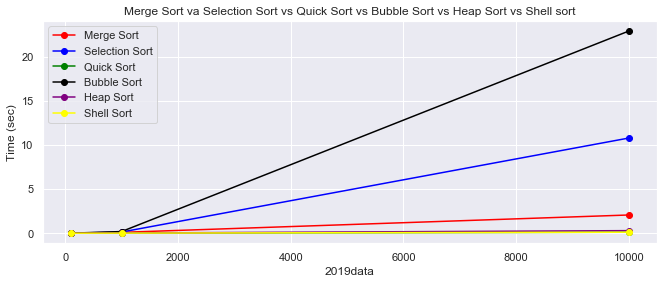

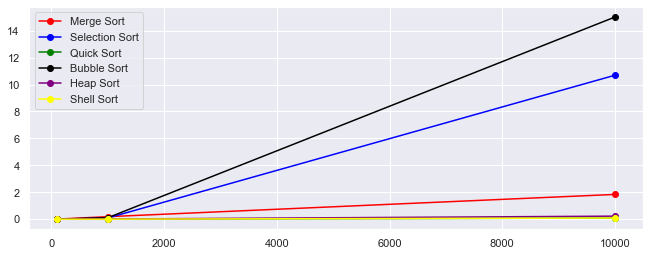

In [199]:
plt.figure(figsize = (11,9))

plt.subplot(2,1,1)
pylab.xlabel('2019data')
pylab.ylabel('Time (sec)')

plt.title("Merge Sort va Selection Sort vs Quick Sort vs Bubble Sort vs Heap Sort vs Shell sort")
plt.plot(x, testTimeMer, "ro-", c="red")
plt.plot(x, testTimeSel, "ro-", c="blue")
plt.plot(x, testTimeQuick, "ro-", c="green")
plt.plot(x, testTimeBubb, "ro-", c="black")
plt.plot(x, testTimeHeap, "ro-", c="purple")
plt.plot(x, testTimeShell, "ro-", c="yellow")
plt.legend(["Merge Sort", "Selection Sort", "Quick Sort", "Bubble Sort",'Heap Sort','Shell Sort'], loc='upper left')
plt.show()

plt.figure(figsize = (11,9))
plt.subplot(2,1,2)
plt.plot(x, testTimeMer20, "ro-", c="red")
plt.plot(x, testTimeSel20, "ro-", c="blue")
plt.plot(x, testTimeQuick20, "ro-", c="green")
plt.plot(x, testTimeBubb20, "ro-", c="black")
plt.plot(x, testTimeHeap20, "ro-", c="purple")
plt.plot(x, testTimeShell20, "ro-", c="yellow")
plt.legend(["Merge Sort", "Selection Sort", "Quick Sort", "Bubble Sort",'Heap Sort','Shell Sort'], loc='upper left')
plt.show()

# Comparison of Shipping and Receiving volumes

In [118]:
df19202 = df1920.copy()

In [119]:
df19202.drop(['Quantity19','Quantity20'], axis = 1 , inplace = True)

In [120]:
df19202 = df19202.dropna(subset = ['percent(%)'])
df19202.head()

percent(%)
type Region Products Shipping and Receiving            
1    강원     가자미      1                       -85.526316
                     2                       -69.440832
            갈치       1                       -60.000000
                     2                       -85.173502
            고등어      2                        56.097561

# Create region array according to products using XS function
xs함수를 이용한 Products별 지역 Array 만들기

In [121]:
df19202 = df19202.unstack([0,2,3])

In [122]:
df19202 = df19202.xs('percent(%)', axis =1 )

In [123]:
df19202 = df19202.xs('2', level = 2,axis = 1)

In [124]:
aname = np.array(df19202.xs('1',axis = 1).columns)

In [125]:
cname = np.array(df19202.xs('오징어', level = 1, axis =1).columns)

In [126]:
print(aname)
print(cname)

['가자미' '갈치' '고등어' '낙지' '도루묵' '명태' '방어' '삼치' '아귀' '오징어' '조기' '주꾸미' '가오리'
 '꼬막' '꽁치' '메기' '멸치' '민어' '박대' '밴댕이' '병어' '장어' '전갱이' '전어' '청어' '해면' '골뱅이'
 '새우' '꼴뚜기']
['1' '2' '3' '4' '6']


## Create region array by products using For Statement
for문을 이용하여 products별 지역 array 만들기

In [127]:
dd11 = df19202.copy()

In [128]:
#dd11

In [129]:
dd11.shape

(8, 88)

In [130]:
a = dd11.xs('{0}'.format(1), axis =1)

In [131]:
a.shape

(8, 29)

In [132]:
ax = []

In [133]:
list1 = []
for i in cname:
    dd12 = dd11.xs('{0}'.format(i),axis = 1)
    for j in aname:
        try :
            print(i)
            print(j)
            dd13 = dd12.xs('{0}'.format(j),axis =1)
            ddnp = list(dd13)
            list1.append(ddnp)
            print(ddnp)
            if i == 1 :
                ax.append(j)
            else :
                kkkk = i
                ax.append(j + kkkk)

            ddnp = []
        except:
            continue
            ax.pop()
    dd12 = dd11

1
가자미
[-69.4408322496749, 7.428061565915682, -27.601809954751133, nan, nan, nan, nan, -31.33514986376022]
1
갈치
[-85.17350157728707, -60.37234042553191, 14950.0, nan, nan, 639.2857142857143, 220.59054089365037, -52.27272727272727]
1
고등어
[56.09756097560976, -47.8663022913601, -42.09666884389288, nan, -7.841823056300267, nan, nan, nan]
1
낙지
[-32.94460641399417, -98.75, 743.4782608695652, nan, nan, nan, nan, nan]
1
도루묵
[3542.857142857143, 219.60784313725492, -37.53753753753754, nan, nan, nan, nan, nan]
1
명태
[9.24956369982548, -48.29931972789115, nan, nan, nan, nan, nan, nan]
1
방어
[-4.285714285714286, -99.10501193317423, -84.40145102781138, nan, nan, nan, nan, nan]
1
삼치
[74.54545454545455, -98.3247835844822, -43.23181049069374, nan, nan, 15.384615384615385, 89.6103896103896, nan]
1
아귀
[80.66666666666666, -71.15869017632241, -99.16107382550335, nan, -95.9119496855346, 4200.0, -98.18181818181819, -48.068006182380216]
1
오징어
[-2.930182081273363, -43.233082706766915, 6.689980234149308, nan, nan,

In [134]:
ar = np.array(list1)

In [135]:
ar[0]

array([-69.44083225,   7.42806157, -27.60180995,          nan,
                nan,          nan,          nan, -31.33514986])

In [136]:
ax[0:5]

['가자미1', '갈치1', '고등어1', '낙지1', '도루묵1']

# Sort Algorithm

## 1) Quick Sort Algorithm  
## O(NlogN)
https://debuglog.tistory.com/67

In [137]:
df19201 = df1920.copy()
df19201 = df19201.dropna(subset = ['percent(%)'])
array4 = np.array(df19201.loc[:,'percent(%)'])

In [138]:
def quick_sorted(arr):
    if len(arr) > 1:
        pivot = arr[len(arr)-1]
        left, mid, right = [], [], []
        for i in range(len(arr)-1):
            if arr[i] < pivot:
                left.append(arr[i])
            elif arr[i] > pivot:
                right.append(arr[i])
            else:
                mid.append(arr[i])
        mid.append(pivot)
        return quick_sorted(left) + mid + quick_sorted(right)
    else:
        return arr
        



In [139]:
# print(quick_sorted(array4))

In [140]:
cc=[]
for i in range(len(ar)):
    bb = ar[i,:]
    bb = bb[~np.isnan(bb)]
    cc.append(ax[i])
    cc.append(quick_sorted(bb))
    bb = None
    print(cc[0:5])
    
        

['가자미1', [-69.4408322496749, -31.33514986376022, -27.601809954751133, 7.428061565915682]]
['가자미1', [-69.4408322496749, -31.33514986376022, -27.601809954751133, 7.428061565915682], '갈치1', [-85.17350157728707, -60.37234042553191, -52.27272727272727, 220.59054089365037, 639.2857142857143, 14950.0]]
['가자미1', [-69.4408322496749, -31.33514986376022, -27.601809954751133, 7.428061565915682], '갈치1', [-85.17350157728707, -60.37234042553191, -52.27272727272727, 220.59054089365037, 639.2857142857143, 14950.0], '고등어1']
['가자미1', [-69.4408322496749, -31.33514986376022, -27.601809954751133, 7.428061565915682], '갈치1', [-85.17350157728707, -60.37234042553191, -52.27272727272727, 220.59054089365037, 639.2857142857143, 14950.0], '고등어1']
['가자미1', [-69.4408322496749, -31.33514986376022, -27.601809954751133, 7.428061565915682], '갈치1', [-85.17350157728707, -60.37234042553191, -52.27272727272727, 220.59054089365037, 639.2857142857143, 14950.0], '고등어1']
['가자미1', [-69.4408322496749, -31.33514986376022, -27.60180

In [141]:
cc[0]

'가자미1'

In [142]:
print(ax)

['가자미1', '갈치1', '고등어1', '낙지1', '도루묵1', '명태1', '방어1', '삼치1', '아귀1', '오징어1', '조기1', '주꾸미1', '가오리1', '꼬막1', '꽁치1', '메기1', '멸치1', '민어1', '박대1', '밴댕이1', '병어1', '장어1', '전갱이1', '전어1', '청어1', '해면1', '골뱅이1', '새우1', '꼴뚜기1', '가자미2', '갈치2', '고등어2', '낙지2', '명태2', '방어2', '삼치2', '아귀2', '오징어2', '조기2', '주꾸미2', '가오리2', '꽁치2', '메기2', '멸치2', '민어2', '병어2', '장어2', '전어2', '청어2', '해면2', '골뱅이2', '새우2', '꼴뚜기2', '낙지3', '명태3', '오징어3', '멸치3', '민어3', '새우3', '가자미4', '아귀4', '오징어4', '해면4', '오징어6', '해면6']


In [203]:
print(aname)
xfish=input('What marine products do you want to sell? :  ')
fishtype= input('1:refrigeration(냉장), 2: frozen(냉동), 3: dried(건), 4: live(활), 5: salt(염장), 6:  Jeotgal:Salted Seafood(젓갈), **Please enter a number : ')

ccc=  cc.index(xfish+fishtype)
a = dd11.xs('{0}'.format(fishtype), axis =1)
a = a[xfish]
vvv = a[a == cc[ccc+1][-1]]
print('')
print('The marine product you chose is ', xfish+fishtype )
print('Therefore, the recommended areas and rate of increase and decrease are as follows: ')
print(vvv)

['가자미' '갈치' '고등어' '낙지' '도루묵' '명태' '방어' '삼치' '아귀' '오징어' '조기' '주꾸미' '가오리'
 '꼬막' '꽁치' '메기' '멸치' '민어' '박대' '밴댕이' '병어' '장어' '전갱이' '전어' '청어' '해면' '골뱅이'
 '새우' '꼴뚜기']
What marine products do you want to sell? :  가자미
1:refrigeration(냉장), 2: frozen(냉동), 3: dried(건), 4: live(활), 5: salt(염장), 6:  Jeotgal:Salted Seafood(젓갈), **Please enter a number : 1

The marine product you chose is  가자미1
Therefore, the recommended areas and rate of increase and decrease are as follows: 
Region
경남    7.428062
Name: 가자미, dtype: float64


## 2) Selection Sort Algorithm
## O(N^2)
https://thebook.io/006935/partxt/xa/08/

In [164]:
def sel_sort(a):
    n = len(a)
    for i in range(0, n - 1):
        min_idx = i
        for j in range(i + 1, n):
            if a[j] < a[min_idx]:
                min_idx = j
        a[i], a[min_idx] = a[min_idx], a[i]
 

sel_sort(array4)
print(array4)

[-9.99711816e+01 -9.97767857e+01 -9.96833439e+01 -9.94907274e+01
 -9.91610738e+01 -9.91167812e+01 -9.91050119e+01 -9.87777632e+01
 -9.87500000e+01 -9.86301370e+01 -9.84122484e+01 -9.83991996e+01
 -9.83247836e+01 -9.81818182e+01 -9.80060831e+01 -9.77682811e+01
 -9.73968128e+01 -9.73040835e+01 -9.70940959e+01 -9.68403332e+01
 -9.68354430e+01 -9.59772993e+01 -9.59119497e+01 -9.46475688e+01
 -9.44237918e+01 -9.43190661e+01 -9.40664557e+01 -9.39939940e+01
 -9.39393939e+01 -9.20931874e+01 -9.20863309e+01 -9.18586419e+01
 -9.18032787e+01 -9.05213270e+01 -9.04002714e+01 -8.90080429e+01
 -8.89961390e+01 -8.87486224e+01 -8.66295265e+01 -8.63387978e+01
 -8.55263158e+01 -8.51735016e+01 -8.49094567e+01 -8.44444444e+01
 -8.44014510e+01 -8.36065574e+01 -8.34224599e+01 -8.34045350e+01
 -8.19084439e+01 -8.16733068e+01 -8.09523810e+01 -8.03787879e+01
 -7.92663973e+01 -7.87671233e+01 -7.85714286e+01 -7.75675676e+01
 -7.75018741e+01 -7.74919614e+01 -7.71872445e+01 -7.64891436e+01
 -7.61904762e+01 -7.56818

In [165]:
for i in range(len(ar)):
    bb = ar[i,:]
    bb = bb[~np.isnan(bb)]
    sel_sort(bb)
    print(bb)
    bb = None
    print('++++')

[-69.44083225 -31.33514986 -27.60180995   7.42806157]
++++
[  -85.17350158   -60.37234043   -52.27272727   220.59054089
   639.28571429 14950.        ]
++++
[-47.86630229 -42.09666884  -7.84182306  56.09756098]
++++
[-98.75       -32.94460641 743.47826087]
++++
[ -37.53753754  219.60784314 3542.85714286]
++++
[-48.29931973   9.2495637 ]
++++
[-99.10501193 -84.40145103  -4.28571429]
++++
[-98.32478358 -43.23181049  15.38461538  74.54545455  89.61038961]
++++
[ -99.16107383  -98.18181818  -95.91194969  -71.15869018  -48.06800618
   80.66666667 4200.        ]
++++
[-43.49529781 -43.23308271  -2.93018208   4.39276486   6.68998023]
++++
[-70.05988024   6.79012346  23.21428571  65.18668903  66.64302361
 409.92122107]
++++
[ -94.0664557 6240.       ]
++++
[-18.86792453  84.21052632]
++++
[-35.48759377]
++++
[-27.64932563]
++++
[-80.37878788]
++++
[-65.08344678 -54.26640128]
++++
[ 17.8470255 511.9047619]
++++
[40.39735099]
++++
[87.14544357]
++++
[-58.82352941 -53.59116022]
++++
[176.8907563]

## 3) Bubble Sort Algorithm
## O(N^2)
https://wayhome25.github.io/cs/2017/04/16/cs-17/

In [166]:
def Bubble_sort(li):
    for i in range(len(li)-1):
        for j in range(len(li)-i-1):
            if li[j]>li[j+1]:
                temp=li[j+1]
                li[j+1]=li[j]
                li[j]=temp
    return li
 


In [167]:
if __name__ =="__main__":
    list_a= array4
    Bubble_sort(list_a)
    print(list_a)

[-9.99711816e+01 -9.97767857e+01 -9.96833439e+01 -9.94907274e+01
 -9.91610738e+01 -9.91167812e+01 -9.91050119e+01 -9.87777632e+01
 -9.87500000e+01 -9.86301370e+01 -9.84122484e+01 -9.83991996e+01
 -9.83247836e+01 -9.81818182e+01 -9.80060831e+01 -9.77682811e+01
 -9.73968128e+01 -9.73040835e+01 -9.70940959e+01 -9.68403332e+01
 -9.68354430e+01 -9.59772993e+01 -9.59119497e+01 -9.46475688e+01
 -9.44237918e+01 -9.43190661e+01 -9.40664557e+01 -9.39939940e+01
 -9.39393939e+01 -9.20931874e+01 -9.20863309e+01 -9.18586419e+01
 -9.18032787e+01 -9.05213270e+01 -9.04002714e+01 -8.90080429e+01
 -8.89961390e+01 -8.87486224e+01 -8.66295265e+01 -8.63387978e+01
 -8.55263158e+01 -8.51735016e+01 -8.49094567e+01 -8.44444444e+01
 -8.44014510e+01 -8.36065574e+01 -8.34224599e+01 -8.34045350e+01
 -8.19084439e+01 -8.16733068e+01 -8.09523810e+01 -8.03787879e+01
 -7.92663973e+01 -7.87671233e+01 -7.85714286e+01 -7.75675676e+01
 -7.75018741e+01 -7.74919614e+01 -7.71872445e+01 -7.64891436e+01
 -7.61904762e+01 -7.56818

In [168]:
for i in range(len(ar)):
    bb = ar[i,:]
    bb = bb[~np.isnan(bb)]
    if __name__ =="__main__":
        list_a= bb
        Bubble_sort(list_a)
        print(list_a)
        list_a = None
        print('++++')


[-69.44083225 -31.33514986 -27.60180995   7.42806157]
++++
[  -85.17350158   -60.37234043   -52.27272727   220.59054089
   639.28571429 14950.        ]
++++
[-47.86630229 -42.09666884  -7.84182306  56.09756098]
++++
[-98.75       -32.94460641 743.47826087]
++++
[ -37.53753754  219.60784314 3542.85714286]
++++
[-48.29931973   9.2495637 ]
++++
[-99.10501193 -84.40145103  -4.28571429]
++++
[-98.32478358 -43.23181049  15.38461538  74.54545455  89.61038961]
++++
[ -99.16107383  -98.18181818  -95.91194969  -71.15869018  -48.06800618
   80.66666667 4200.        ]
++++
[-43.49529781 -43.23308271  -2.93018208   4.39276486   6.68998023]
++++
[-70.05988024   6.79012346  23.21428571  65.18668903  66.64302361
 409.92122107]
++++
[ -94.0664557 6240.       ]
++++
[-18.86792453  84.21052632]
++++
[-35.48759377]
++++
[-27.64932563]
++++
[-80.37878788]
++++
[-65.08344678 -54.26640128]
++++
[ 17.8470255 511.9047619]
++++
[40.39735099]
++++
[87.14544357]
++++
[-58.82352941 -53.59116022]
++++
[176.8907563]

## 4) Merge Sort Algorithm
## O(NlogN)
https://www.chegg.com/homework-help/questions-and-answers/code-mergesort-python-program-implementation-mergesort-def-mergesort-arr-iflen-arr-1-mid-l-q39885150

In [169]:
def mergeSort(arr):
  if len(arr) > 1:
    mid = len(arr)//2
    L = arr[:mid]
    R = arr[mid:]

    mergeSort(L)
    mergeSort(R)

    i = j = k = 0

    while i < len(L) and j < len(R):
      if L[i] < R[j] :
        arr[k] = L[i]
        i+=1
      else :
        arr[k] = R[j]
        j+=1
      k+=1

    while i < len(L) :
      arr[k] = L[i]
      i+=1
      k+=1

    while j < len(R) :
      arr[k] = R[j]
      j+=1
      k+=1
    
    return arr


In [170]:
arr = array4

print(mergeSort(arr))

[-9.99711816e+01 -9.97767857e+01 -9.96833439e+01 -9.94907274e+01
 -9.91610738e+01 -9.91167812e+01 -9.91050119e+01 -9.87777632e+01
 -9.87500000e+01 -9.86301370e+01 -9.84122484e+01 -9.83991996e+01
 -9.83247836e+01 -9.81818182e+01 -9.80060831e+01 -9.77682811e+01
 -9.73968128e+01 -9.73040835e+01 -9.70940959e+01 -9.68403332e+01
 -9.68354430e+01 -9.59772993e+01 -9.59119497e+01 -9.46475688e+01
 -9.44237918e+01 -9.43190661e+01 -9.40664557e+01 -9.39939940e+01
 -9.39393939e+01 -9.20931874e+01 -9.20863309e+01 -9.18586419e+01
 -9.18032787e+01 -9.05213270e+01 -9.04002714e+01 -8.90080429e+01
 -8.89961390e+01 -8.87486224e+01 -8.66295265e+01 -8.63387978e+01
 -8.55263158e+01 -8.51735016e+01 -8.49094567e+01 -8.44444444e+01
 -8.44014510e+01 -8.36065574e+01 -8.34224599e+01 -8.34045350e+01
 -8.19084439e+01 -8.16733068e+01 -8.09523810e+01 -8.03787879e+01
 -7.92663973e+01 -7.87671233e+01 -7.85714286e+01 -7.75675676e+01
 -7.75018741e+01 -7.74919614e+01 -7.71872445e+01 -7.64891436e+01
 -7.61904762e+01 -7.56818

In [171]:
for i in range(len(ar)):
    bb = ar[i,:]
    bb = bb[~np.isnan(bb)]
    mergeSort(bb)
    print(bb)
    
    bb = None
    print('++++')

[-69.44083225 -31.33514986 -31.33514986 -31.33514986]
++++
[-85.17350158 -60.37234043 -52.27272727 -52.27272727 -52.27272727
 -52.27272727]
++++
[-47.86630229 -47.86630229 -42.09666884  -7.84182306]
++++
[-98.75       -98.75       743.47826087]
++++
[-37.53753754 -37.53753754 -37.53753754]
++++
[-48.29931973 -48.29931973]
++++
[-99.10501193 -99.10501193 -84.40145103]
++++
[-98.32478358 -98.32478358 -43.23181049  15.38461538  89.61038961]
++++
[-99.16107383 -99.16107383 -99.16107383 -98.18181818 -98.18181818
 -98.18181818 -48.06800618]
++++
[-43.49529781 -43.49529781 -43.49529781 -43.49529781 -43.49529781]
++++
[-70.05988024   6.79012346   6.79012346   6.79012346   6.79012346
   6.79012346]
++++
[-94.0664557 -94.0664557]
++++
[-18.86792453  84.21052632]
++++
[-35.48759377]
++++
[-27.64932563]
++++
[-80.37878788]
++++
[-65.08344678 -54.26640128]
++++
[ 17.8470255 511.9047619]
++++
[40.39735099]
++++
[87.14544357]
++++
[-58.82352941 -58.82352941]
++++
[176.8907563]
++++
[1.38888889 1.3888

In [172]:
def mergeSort(arr):
  if len(arr) > 1:
    mid = len(arr)//2
    L = arr[:mid]
    R = arr[mid:]

    mergeSort(L)
    mergeSort(R)

    i = j = k = 0

    while i < len(L) and j < len(R):
      if L[i] < R[j] :
        arr[k] = L[i]
        i+=1
      else :
        arr[k] = R[j]
        j+=1
      k+=1

    while i < len(L) :
      arr[k] = L[i]
      i+=1
      k+=1

    while j < len(R) :
      arr[k] = R[j]
      j+=1
      k+=1
    
    print(arr)

arr = [6, 5, 4, 8, 2, 3, 7, 1]

print(mergeSort(arr))

[5, 6]
[4, 8]
[4, 5, 6, 8]
[2, 3]
[1, 7]
[1, 2, 3, 7]
[1, 2, 3, 4, 5, 6, 7, 8]
None


## 5) Heap Sort Algorithm
## O(NlogN)
https://blog.tomclansys.com/56 

In [173]:
def heapify(arr, n, i):
        largest = i 
        l = 2 * i + 1 
        r = 2 * i + 2 
        
        if l < n and arr[i] < arr[l]:
                largest = l 
                
        if r < n and arr[largest] < arr[r]: 
                largest = r 
                
        if largest != i:
                arr[i],arr[largest] = arr[largest],arr[i] 
                heapify(arr, n, largest)

In [174]:
def heapSort(arr):
        n = len(arr) 
        for i in range(n, -1, -1): 
                heapify(arr, n, i) 
                
        for i in range(n-1, 0, -1): 
                arr[i], arr[0] = arr[0], arr[i] 
                heapify(arr, i, 0) 
                
arr = [ 12, 11, 13, 5, 6, 7] 
heapSort(arr) 
n = len(arr) 
for i in range(n): 
    print ("%d" %arr[i])

5
6
7
11
12
13


In [175]:
arr = array4

heapSort(arr)
n = len(arr) 
#for i in range(n): 
    #print ("%d" %arr[i])

In [176]:
for i in range(len(ar)):
    bb = ar[i,:]
    bb = bb[~np.isnan(bb)]
    heapSort(bb)
    print(bb)
    
    bb = None
    print('++++')

[-69.44083225 -31.33514986 -27.60180995   7.42806157]
++++
[  -85.17350158   -60.37234043   -52.27272727   220.59054089
   639.28571429 14950.        ]
++++
[-47.86630229 -42.09666884  -7.84182306  56.09756098]
++++
[-98.75       -32.94460641 743.47826087]
++++
[ -37.53753754  219.60784314 3542.85714286]
++++
[-48.29931973   9.2495637 ]
++++
[-99.10501193 -84.40145103  -4.28571429]
++++
[-98.32478358 -43.23181049  15.38461538  74.54545455  89.61038961]
++++
[ -99.16107383  -98.18181818  -95.91194969  -71.15869018  -48.06800618
   80.66666667 4200.        ]
++++
[-43.49529781 -43.23308271  -2.93018208   4.39276486   6.68998023]
++++
[-70.05988024   6.79012346  23.21428571  65.18668903  66.64302361
 409.92122107]
++++
[ -94.0664557 6240.       ]
++++
[-18.86792453  84.21052632]
++++
[-35.48759377]
++++
[-27.64932563]
++++
[-80.37878788]
++++
[-65.08344678 -54.26640128]
++++
[ 17.8470255 511.9047619]
++++
[40.39735099]
++++
[87.14544357]
++++
[-58.82352941 -53.59116022]
++++
[176.8907563]

## 6) Shell Sort Algorithm
## O(N^1.5)
https://blog.tomclansys.com/60

In [177]:
def gapInsertionSort(alist, interval, startposition):
    # the 'nth' element in sublist is alist[startposition + gap*n] 
    for index in range(startposition, len(alist), interval):
        position = index 
        currentValue = alist[index] 
        while position >= interval and alist[position-interval] > currentValue: 
            alist[position] = alist[position - interval] 
            position -= interval 
        alist[position] = currentValue 
        
        
def shellSort(alist): 
    interval = len(alist) // 2 
    while interval > 0: 
        for i in range(interval): 
            gapInsertionSort(alist, interval, i) 
            #print(alist)
        interval = interval // 2 
        
alist = [8,6,5,3,2,4,7,1] 
shellSort(alist) 
print(alist)

[1, 2, 3, 4, 5, 6, 7, 8]


In [178]:
alist = array4

#print(alist)

In [179]:
for i in range(len(ar)):
    bb = ar[i,:]
    bb = bb[~np.isnan(bb)]
    shellSort(bb)
    print(bb)
    
    bb = None
    print('++++')

[-69.44083225 -31.33514986 -27.60180995   7.42806157]
++++
[  -85.17350158   -60.37234043   -52.27272727   220.59054089
   639.28571429 14950.        ]
++++
[-47.86630229 -42.09666884  -7.84182306  56.09756098]
++++
[-98.75       -32.94460641 743.47826087]
++++
[ -37.53753754  219.60784314 3542.85714286]
++++
[-48.29931973   9.2495637 ]
++++
[-99.10501193 -84.40145103  -4.28571429]
++++
[-98.32478358 -43.23181049  15.38461538  74.54545455  89.61038961]
++++
[ -99.16107383  -98.18181818  -95.91194969  -71.15869018  -48.06800618
   80.66666667 4200.        ]
++++
[-43.49529781 -43.23308271  -2.93018208   4.39276486   6.68998023]
++++
[-70.05988024   6.79012346  23.21428571  65.18668903  66.64302361
 409.92122107]
++++
[ -94.0664557 6240.       ]
++++
[-18.86792453  84.21052632]
++++
[-35.48759377]
++++
[-27.64932563]
++++
[-80.37878788]
++++
[-65.08344678 -54.26640128]
++++
[ 17.8470255 511.9047619]
++++
[40.39735099]
++++
[87.14544357]
++++
[-58.82352941 -53.59116022]
++++
[176.8907563]